# Semester 1 Project Submission



## Elliot

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

## Ian

In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import sqrt
%matplotlib inline

### Items to be Resolved:
- Check for nulls in the sql database tables being used
    - See following cell for findings.
- Resolve found nulls 
    - Rows where null can be excluded. This is due to size and number of entries in dataset tables.
- Experiment with joins to get tables wanted
    - Joined movie_basics with movie_ratings. Tried further joins but they get very large, very quickly (even using inner joins).
- Export joined tables to dataframe
    - Complete.
- Determine how to best use data for analysis
    - Complete.
    
### Hypothesis Testing Checklist
- Test runtime to domestic revenue and worldwide revenue - Complete.
    - Runtime to revenue would assist with recommending best length of film to make for optimal revenue outlook
- Break down runtime into buckets of time periods to calculate for correlation - Complete.
    - Will isolate periods with best correlation to complement observations from runtime and revenue correlation tests.
____________

### Data Observations and Exploration

- persons % bunch of null values in birth_year, death_year, and in primary_profession
- writers % NONE ARE NULL
- directors % NONE ARE NULL
- known_for % NONE ARE NULL
- principals % NO NULLS IN CATEGORY
- movie_basics % missing data in genres, runtime_minutes
- movie_ratings % NONE ARE NULL
- movie_akas % NO TITLES ARE NULL

In [3]:
# creating connection to database
conn = sql.connect("databases/im.db")

In [4]:
# movie basics query stage 1
q = """
SELECT
    *
FROM
    movie_basics
/*where statement below reduces dataset from 146144 rows to 112233*/
WHERE
    runtime_minutes IS NOT NULL AND genres IS NOT NULL
;"""
pd.read_sql(q, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
4,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
112228,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
112229,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
112230,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
112231,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [5]:
# test to see how many values of each genre there are
q = """
SELECT
    *
FROM
    movie_basics
/*where statement below reduces dataset from 146144 rows to 112233*/
WHERE
    runtime_minutes IS NOT NULL AND genres IS NOT NULL
;"""
test2_df = pd.read_sql(q, conn)
test2_df.value_counts('genres')

genres
Documentary                   24672
Drama                         15725
Comedy                         6413
Comedy,Drama                   3163
Horror                         2975
                              ...  
Documentary,Fantasy,Sci-Fi        1
History,News,War                  1
Adventure,Animation,Crime         1
Drama,Mystery,Sport               1
Adventure,History,Music           1
Length: 1040, dtype: int64

In [6]:
# movie ratings query stage 1
q = """
SELECT
    *
FROM
    movie_ratings
/*where statement below reduces dataset from 73856 rows to 73856 NO NULLS*/
WHERE
    averagerating IS NOT NULL AND numvotes IS NOT NULL
;"""
pd.read_sql(q, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [7]:
# movie_akas query stage 1
q = """
SELECT
    *
FROM
    movie_akas
/*where statement below reduces dataset from 331703 rows to 331703 NO NULLS*/
WHERE
    title IS NOT NULL
;"""
pd.read_sql(q, conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [8]:
# persons table query stage 1
q = """
SELECT
    *
FROM
    persons
WHERE
    primary_profession IS NULL
;"""
pd.read_sql(q, conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0120366,Ralph Bunche,1904.0,1971.0,None
1,nm0256636,Emperor Franz Josef,1830.0,1916.0,None
2,nm0278661,Renee Firestone,NaN,NaN,None
3,nm0441808,Mike Katz,1944.0,NaN,None
4,nm0688002,Norman Podhoretz,1930.0,NaN,None
...,...,...,...,...,...
51335,nm9964778,Brian Espitia,NaN,NaN,None
51336,nm9967439,Jade Doucette,NaN,NaN,None
51337,nm9969939,Anna Bligh,NaN,NaN,None
51338,nm9976388,Naomie Monplaisir,NaN,NaN,None


In [9]:
# principals exploration query
q = """
SELECT
    *
FROM
    principals
;"""
pd.read_sql(q, conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [10]:
# principals category query
q = """
SELECT
    movie_id, person_id, category
FROM
    principals
;"""
test1_df = pd.read_sql(q, conn)
test1_df.value_counts('category')

category
actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
dtype: int64

In [11]:
# directors exploration query
q = """
SELECT
    *
FROM
    directors
;"""
pd.read_sql(q, conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [12]:
# known_for exploration query
q = """
SELECT
    *
FROM
    known_for
;"""
pd.read_sql(q, conn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


______________________________

### Consolidation Queries

In [13]:
# combining movie basics and movie ratings
q = """
SELECT
    mb.primary_title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND mb.runtime_minutes IS NOT NULL
ORDER BY
    mr.averagerating DESC
;"""
pd.read_sql(q, conn)
# added in a filter that would filter out rows that have less than 30 votes

,primary_title,runtime_minutes,genres,AverageRating,Num_Votes
0,Gini Helida Kathe,138.0,Drama,9.9,417
1,RISE: The Story of Augustines,80.0,"Documentary,Music",9.8,45
2,Once Upon a Time ... in Hollywood,159.0,"Comedy,Drama",9.7,5600
3,MANRY AT SEA ~ In the Wake of a Dream,94.0,Documentary,9.7,48
4,My Darling Son,61.0,Documentary,9.7,32
...,...,...,...,...,...
41087,Death Forest 4,70.0,Horror,1.0,230
41088,Extrand,91.0,"Comedy,Drama",1.0,107
41089,Clownfish,83.0,"Drama,Romance",1.0,67
41090,"Yes, Sir! 7",111.0,"Comedy,Drama",1.0,96


In [14]:
# combining movie basics and movie ratings
q = """
SELECT
    mb.primary_title, mb.runtime_minutes, mb.genres, mr.averagerating
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(averagerating AS float) == 10
    AND runtime_minutes IS NOT NULL
ORDER BY
    mr.averagerating DESC
;"""
# checking to see titles with a rating of 10.0
# update to above comment: restricting num_votes by 30 (like above) will
test3_df = pd.read_sql(q, conn)
test3_df

,primary_title,runtime_minutes,genres,averagerating
0,Exteriores: Mulheres Brasileiras na Diplomacia,52.0,Documentary,10.0
1,The Dark Knight: The Ballad of the N Word,129.0,"Comedy,Drama",10.0
2,Freeing Bernie Baran,100.0,"Crime,Documentary",10.0
3,Hercule contre Hermès,72.0,Documentary,10.0
4,I Was Born Yesterday!,31.0,Documentary,10.0
5,Revolution Food,70.0,Documentary,10.0
6,Fly High: Story of the Disc Dog,65.0,Documentary,10.0
7,The Paternal Bond: Barbary Macaques,59.0,Documentary,10.0
8,Requiem voor een Boom,48.0,Documentary,10.0
9,A Dedicated Life: Phoebe Brand Beyond the Group,93.0,Documentary,10.0


In [15]:
# persons to principals to movie table NO FILTERS
q = """
SELECT 
    pe.person_id
    ,pe.primary_name
    ,AVG(mr.averagerating) AS AverageRating
    ,COUNT(mb.primary_title) AS Num_of_Appearances
FROM
    persons AS pe
    JOIN principals AS pr
        USING(person_id)
    JOIN movie_basics AS mb
        USING(movie_id)
    JOIN movie_ratings as mr
        USING(movie_id)
GROUP BY
    pe.primary_name
ORDER BY
    Num_of_Appearances DESC
LIMIT 10
;"""
pd.read_sql(q, conn)

,person_id,primary_name,AverageRating,Num_of_Appearances
0,nm1930572,Kevin MacLeod,6.337427,171
1,nm0000616,Eric Roberts,4.823770,122
2,nm0000636,William Shakespeare,7.116364,110
3,nm2065631,Gopi Sundar,5.929897,97
4,nm0215842,Vicente G. del Rosario III,6.278481,79
5,nm3888981,S. Thaman,5.615789,76
6,nm0695177,Prakash Raj,5.983784,74
7,nm0103977,Brahmanandam,5.650000,74
8,nm0215861,Veronique del Rosario-Corpus,6.246575,73
9,nm0089658,Jason Blum,5.839437,71


In [16]:
# finding the average ratings per film and num of appearances for writers
q = """
SELECT 
    pe.person_id
    ,pr.category
    ,pe.primary_name
    ,AVG(mr.averagerating) AS AverageRating
    ,COUNT(mb.primary_title) AS Num_of_Appearances
FROM
    persons AS pe
    JOIN principals AS pr
        USING(person_id)
    JOIN movie_basics AS mb
        USING(movie_id)
    JOIN movie_ratings as mr
        USING(movie_id)
WHERE
    pr.category = 'writer'
    
GROUP BY
    pe.primary_name
ORDER BY
    Num_of_Appearances DESC
;"""
pd.read_sql(q, conn)

,person_id,category,primary_name,AverageRating,Num_of_Appearances
0,nm0000636,writer,William Shakespeare,7.116364,110
1,nm0893128,writer,Kona Venkat,5.943750,32
2,nm0598531,writer,Mark Monroe,7.380645,31
3,nm3057599,writer,Dheeraj Rattan,6.403333,30
4,nm3015321,writer,Alim Sudio,6.356667,30
...,...,...,...,...,...
36703,nm7958873,writer,A. García de Quirós,8.900000,1
36704,nm7756072,writer,A Type Machine,4.500000,1
36705,nm3211397,writer,A Shawn Austin,8.800000,1
36706,nm7817712,writer,'Om' Rakesh Chaturvedi,5.600000,1


In [17]:
# finding the average ratings per film and num of appearances for directors
q = """
SELECT 
    pe.person_id
    ,pr.category
    ,pe.primary_name
    ,AVG(mr.averagerating) AS AverageRating
    ,COUNT(mb.primary_title) AS Num_of_Appearances
FROM
    persons AS pe
    JOIN principals AS pr
        USING(person_id)
    JOIN movie_basics AS mb
        USING(movie_id)
    JOIN movie_ratings as mr
        USING(movie_id)
WHERE
    pr.category = 'director'
    
GROUP BY
    pe.primary_name
HAVING
    CAST(Num_of_Appearances AS int) > 1
ORDER BY
    Num_of_Appearances DESC
;"""
pd.read_sql(q, conn)

,person_id,category,primary_name,AverageRating,Num_of_Appearances
0,nm2551464,director,Nayato Fio Nuala,4.713514,37
1,nm0213983,director,David DeCoteau,3.400000,27
2,nm4341114,director,Dustin Ferguson,3.788462,26
3,nm3583561,director,Larry Rosen,7.184000,25
4,nm0559285,director,Rizal Mantovani,5.842857,21
...,...,...,...,...,...
13686,nm5374119,director,A.M.R. Ramesh,6.700000,2
13687,nm3527772,director,A.M. Greene,6.700000,2
13688,nm5989634,director,A.K. Strom,4.300000,2
13689,nm2270935,director,A.J. Edwards,6.350000,2


In [18]:
# finding the average ratings per film and num of appearances for lead actor/actress
# lead actor/actress is found by filtering on principals' column called ordering for the 1st actor
q = """
SELECT 
    pe.person_id
    ,pr.category
    ,pe.primary_name
    ,AVG(mr.averagerating) AS AverageRating
    ,COUNT(mb.primary_title) AS Num_of_Appearances
FROM
    persons AS pe
    JOIN principals AS pr
        USING(person_id)
    JOIN movie_basics AS mb
        USING(movie_id)
    JOIN movie_ratings as mr
        USING(movie_id)
WHERE
    pr.category IN ('actor', 'actress')
    AND CAST(AverageRating AS float) >= 6
    AND CAST(pr.ordering AS int) == 1
GROUP BY
    pe.primary_name
HAVING
    CAST(Num_of_Appearances AS int) > 2
ORDER BY
    Num_of_Appearances DESC
;"""
# filtering for only actor/actresses who had an average rating of 6 or greater
pd.read_sql(q, conn)

,person_id,category,primary_name,AverageRating,Num_of_Appearances
0,nm5954636,actor,Sergey A.,7.550000,30
1,nm1335387,actor,Prithviraj Sukumaran,7.025000,24
2,nm0000616,actor,Eric Roberts,7.230000,20
3,nm3534300,actor,Babusan,7.015789,19
4,nm4043111,actor,Vijay Sethupathi,7.594444,18
...,...,...,...,...,...
1680,nm6012803,actor,Abed Abest,6.733333,3
1681,nm0180411,actress,Abbie Cornish,6.300000,3
1682,nm4742249,actor,Aaryan Sigdel,7.033333,3
1683,nm0669853,actor,Aaron Pedersen,6.533333,3


In [19]:
# finding the average ratings per film and num of appearances for actor/actress
q = """
SELECT 
    pe.person_id
    ,pr.category
    ,pe.primary_name
    ,AVG(mr.averagerating) AS AverageRating
    ,COUNT(mb.primary_title) AS Num_of_Appearances
FROM
    persons AS pe
    JOIN principals AS pr
        USING(person_id)
    JOIN movie_basics AS mb
        USING(movie_id)
    JOIN movie_ratings as mr
        USING(movie_id)
WHERE
    pr.category IN ('actor', 'actress')
    AND CAST(AverageRating AS float) >= 6
GROUP BY
    pe.primary_name
HAVING
    CAST(Num_of_Appearances AS int) > 2
ORDER BY
    Num_of_Appearances DESC
;"""
# filtering for only actor/actresses who had an average rating of 6 or greater
pd.read_sql(q, conn)

,person_id,category,primary_name,AverageRating,Num_of_Appearances
0,nm0695177,actor,Prakash Raj,6.961905,42
1,nm5954636,actor,Sergey A.,7.458824,34
2,nm1384413,actor,Saswata Chatterjee,6.897059,34
3,nm2794335,actor,Sadhu Kokila,6.878125,32
4,nm0000616,actor,Eric Roberts,7.050000,32
...,...,...,...,...,...
8955,nm3810208,actor,Aarif Rahman,7.100000,3
8956,nm5615313,actor,Aari,6.733333,3
8957,nm3933547,actress,Aahana Kumra,6.466667,3
8958,nm4462167,actor,AJ Muhlach,7.433333,3


In [20]:
# finding the average ratings per film and num of appearances for producer
# hard to quantify where to limit here regarding appearances -- producers often only produce once, apparently
q = """
SELECT 
    pe.person_id
    ,pr.category
    ,pe.primary_name
    ,AVG(mr.averagerating) AS AverageRating
    ,COUNT(mb.primary_title) AS Num_of_Appearances
FROM
    persons AS pe
    JOIN principals AS pr
        USING(person_id)
    JOIN movie_basics AS mb
        USING(movie_id)
    JOIN movie_ratings as mr
        USING(movie_id)
WHERE
    pr.category = 'producer'
    AND CAST(AverageRating AS float) >= 6
GROUP BY
    pe.primary_name
HAVING
    CAST(Num_of_Appearances AS int) > 1
ORDER BY
    AverageRating DESC
;"""
pd.read_sql(q, conn)

,person_id,category,primary_name,AverageRating,Num_of_Appearances
0,nm7574932,producer,Stephanie Benamra,9.80,2
1,nm5641779,producer,Marvin Glover,9.30,2
2,nm1979830,producer,Marija Kosor,9.25,4
3,nm4813335,producer,Igor Jelinovic,9.25,2
4,nm4099687,producer,Tyler Marino,9.20,2
...,...,...,...,...,...
7727,nm2994729,producer,Didier Costet,6.00,2
7728,nm3450764,producer,David Mimran,6.00,3
7729,nm2820211,producer,Christophe Barral,6.00,2
7730,nm2208460,producer,Atsushi Moriyama,6.00,3


## How to Check for Statistically Significant Correlation

1. State your null and alternative hypotheses, along with your alpha.
2. Retrieve the sample being tested
3. Calculate the test statistic, r
4. Calculate degrees of freedom and find r-critical using table or calculator (source I used since we have large datasets with degrees of freedom that are hard to find on a table and I could not locate a stastical package to calculate the r-critical in-notebook): https://www.calculators.tech/t-value-calculator)
5. If the absolute value of r is greater than r-critical, the correlation is statistically significant and we reject the null hypothesis. If the absolute value of r is less than r-critical, the correlation is not statistically signifcant and we fail to reject the null hypothesis.

### Testing Runtime and Average Rating

In [21]:
# added WHERE clause to remove movies from dataframe if longer than 3.5 hours - took away 65 values from dataset
# and reduced runtime mean, std dev.!
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes AS Runtime
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
ORDER BY
    mb.runtime_minutes DESC
;"""
df_allrt = pd.read_sql(q, conn)
df_allrt

,movie_id,title,Runtime,genres,AverageRating,Num_Votes
0,tt5536316,National Theatre Live: Les Liaisons Dangereuses,210.0,Romance,8.3,68
1,tt1113829,George Harrison: Living in the Material World,208.0,"Biography,Documentary,Music",8.2,9372
2,tt4937126,It All Started at the End,208.0,Documentary,7.9,186
3,tt6846134,National Theatre Live: Amadeus,206.0,Musical,8.3,66
4,tt6244196,Elvis Presley: The Searcher,205.0,Documentary,7.7,902
...,...,...,...,...,...,...
40930,tt6191254,We Are Not Alone,12.0,Documentary,4.9,113
40931,tt2330698,The Birdman,11.0,"Biography,Documentary,Music",5.9,62
40932,tt3263874,First to Fall,10.0,"Action,Adventure,Documentary",7.7,36
40933,tt5172042,The Asylum,10.0,Documentary,4.3,49


In [22]:
df_allrt.duplicated().value_counts() 

False    40935
dtype: int64

### Ho:
##### - There is no correlation between runtime and average rating. 

### Ha:
##### - There is a statistically significant correlation between runtime and average rating at the 95% level. 

In [25]:
df = df_allrt['Runtime'].count() - 2 # getting degrees of freedom to determine r-critical
df

40933

In [26]:
# r-critical value to test if found r is statistically signifcant
critical_r = 0.0081
# Source: https://www.calculators.tech/t-value-calculator
# (Unable to calculate by hand as I have been unable to find a direct formula to find this - must use either r-critical table or a r-crit calculator like the above source)

In [27]:
# calculating correlation

x = df_allrt['Runtime']
y = df_allrt['AverageRating']

r = x.corr(y) # result is the pearson correlation coefficient -- seems we do have a positive correlation!
r

print(f'Pearson Correlation: {r} | r-critical: {critical_r} | Is r greater? {abs(r) >= critical_r}')
if abs(r) >= critical_r:
    print("Reject the null")
elif abs(r) < critical_r:
    print("Fail to reject null")

Pearson Correlation: 0.10138858194769919 | r-critical: 0.0081 | Is r greater? True
Reject the null


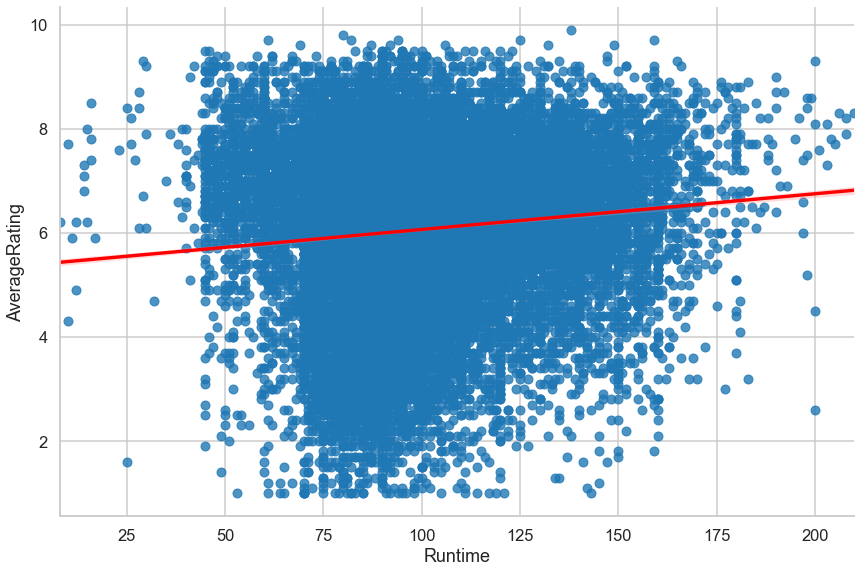

In [28]:
sns.set_style("whitegrid")
sns.set_context("talk")
sns.lmplot(x="Runtime", y="AverageRating", data=df_allrt, line_kws={'color': 'red'}, height=8, aspect=1.5);

#### Conclusion:
- For 95% of cases, there is a weak positive correlation of 0.1014 between runtime and rating.
- Now, we will drill in further to observe individual groupings

### Operating Notion with Runtime Samples:
- "The Academy of Motion Picture Arts and Sciences defines a feature as a film that runs for more than 40 minutes (with short films being 40 or fewer minutes). Still, the Screen Actors Guild asserts that a feature's running time is 60 minutes, so there's not exactly a widespread agreement."

Source: https://www.arcstudiopro.com/blog/what-is-a-feature-film#:~:text=The%20Academy%20of%20Motion%20Picture,not%20exactly%20a%20widespread%20agreement

In [254]:
# standardizing population for secondary visualizations to follow
pop_standardized_rating = [(x-mu)/std for x in df_allrt['AverageRating']]
pop_z_mean = np.mean(pop_standardized_rating)
pop_z_mean

-7.359719554471296e-16

### Less than 40 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the average rating of a movie that has a runtime of less than 40 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the average rating of a movie that has a runtime of less than 40 minutes and the population. 

In [168]:
# runtime sample 1 - short films (between 0 and 40 minutes)
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes AS Runtime
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 40
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.primary_title != 'The Death of a Security Guard'
ORDER BY
    mb.runtime_minutes DESC
;"""
df_up40 = pd.read_sql(q, conn)
df_up40

,movie_id,title,Runtime,genres,AverageRating,Num_Votes
0,tt1535421,Air Racers 3D,40.0,"Action,Adventure,Documentary",7.0,38
1,tt1777610,Flying Monsters 3D with David Attenborough,40.0,Documentary,7.6,787
2,tt1866282,Triangle: Remembering the Fire,40.0,Documentary,8.0,130
3,tt1937274,Hurricane,40.0,Documentary,7.1,148
4,tt2073128,To the Arctic 3D,40.0,Documentary,6.6,1005
5,tt2174750,Flight of the Butterflies,40.0,"Biography,Documentary,Drama",7.1,414
6,tt2296418,Sagat,40.0,"Biography,Documentary",5.7,35
7,tt3195742,Journey to the South Pacific,40.0,Documentary,6.5,145
8,tt3756302,Friday the 13th Part 3: The Memoriam Documentary,40.0,Documentary,7.1,31
9,tt8632844,Oceans: Our Blue Planet,40.0,Documentary,7.3,131


In [181]:
# z-test - less than 40 minutes ratings run

# two-tailed z-test

a = 0.025

x_bar = df_up40['AverageRating'].mean()
n = df_up40['AverageRating'].count()
std = df_allrt['AverageRating'].std()
mu = df_allrt['AverageRating'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

Sample Mean: 7.113333333333332 | Population Mean: 6.0503090265054364 | Sample Size: 45
p-value: 1.1933091592641887e-07 | z-score: 5.1663874288520955 | Is p less than alpha? True
Reject the null


 Standardized Sample Mean: 0.7701595659342435


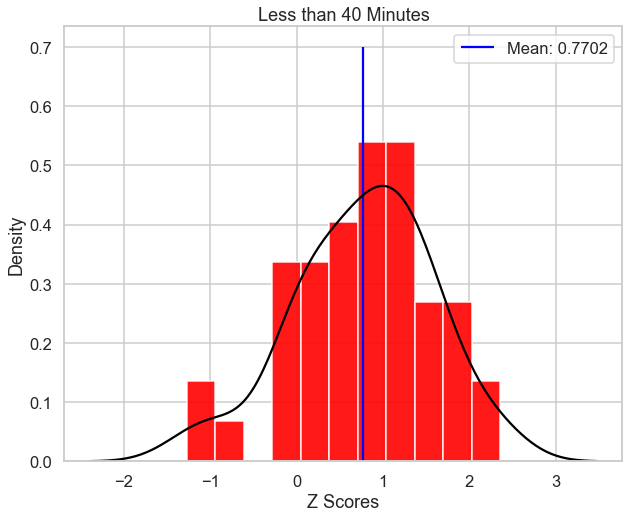

In [270]:
# normalizing distribution with for loop
samp_standardized_rating = [(x-mu)/std for x in df_up40['AverageRating']]
z_mean = np.mean(samp_standardized_rating)
print(f' Standardized Sample Mean: {z_mean}')

# visualizing above distribution as histogram
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(samp_standardized_rating, bins=11, density=True, color='r', alpha=0.9)
ax.set_xlabel('Z Scores')
ax.set_title('Less than 40 Minutes')

# applying normalized curve over histogram
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=z_mean, ymin=0, ymax=0.7, color='b', label='Mean: 0.7702')
ax.legend()

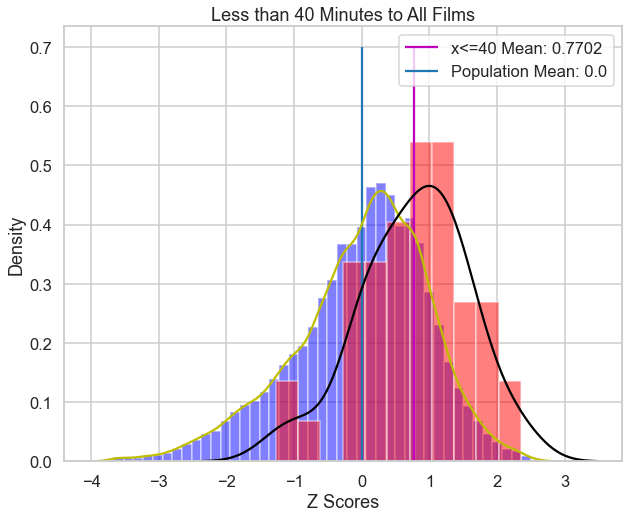

In [264]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=45, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=11, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='x<=40 Mean: 0.7702')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('Less than 40 Minutes to All Films')
plt.legend()

### Correlation

### Ho:
##### - There is no correlation between runtime and average rating for movies that are less than 40 minutes. 

### Ha:
##### - There is a statistically significant correlation between runtime and average rating at the 95% level for movies that are less than 40 minutes. 

In [ ]:
# r-critical value to test if found r is statistically signifcant
critical_r = 0.2510
# Source: https://www.calculators.tech/t-value-calculator
# (Unable to calculate by hand as I have been unable to find a direct formula to find this - must use either r-critical table or a r-crit calculator like the above source)
df = df_up40['Runtime'].count() - 2 # getting degrees of freedom to determine r-critical
df

In [ ]:
# calculating correlation

x = df_up40['Runtime']
y = df_up40['AverageRating']

r = x.corr(y) # result is the pearson correlation coefficient
r

print(f'Pearson Correlation: {r} | r-critical: {critical_r} | Is r greater? {abs(r) >= critical_r}')
if abs(r) >= critical_r:
    print("Reject the null")
elif abs(r) < critical_r:
    print("Fail to reject null")

In [ ]:
sns.lmplot(x="Runtime", y="AverageRating", data=df_up40, line_kws={'color': 'red'}, height=8, aspect=1.5);

### 40 to 60 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the average rating of a movie that has a runtime of between 40 minutes and 60 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the average rating of a movie that has a runtime of between 40 minutes and 60 minutes and other movies in the population.

In [41]:
# runtime sample 2 - long-form short films (40.0001 minutes to 60 minutes)
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes AS Runtime
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) BETWEEN 40.0001 AND 60
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
ORDER BY
    mb.runtime_minutes DESC
;"""
df_4060 = pd.read_sql(q, conn)
df_4060

,movie_id,title,Runtime,genres,AverageRating,Num_Votes
0,tt0479051,The Greater Meaning of Water,60.0,"Drama,Sport",6.5,40
1,tt0808245,A Letter to Elia,60.0,Documentary,7.6,799
2,tt0843839,The Fallen Word,60.0,"Drama,Fantasy,Mystery",7.4,35
3,tt1002965,Call of Life,60.0,Documentary,7.8,31
4,tt10091696,Dybbuk Box: True Story of Chris Chambers,60.0,Horror,5.8,114
...,...,...,...,...,...,...
964,tt7860270,Pandas,42.0,Documentary,7.4,306
965,tt8292528,Altin Fircali Adam,42.0,Documentary,9.2,50
966,tt1529567,Sea Rex 3D: Journey to a Prehistoric World,41.0,Documentary,6.9,364
967,tt2770950,The Presumption of Justice,41.0,"Crime,Documentary,History",5.1,513


In [162]:
# z-test - 40 to 60 minutes ratings run

a = 0.025

# two-tailed z-test

x_bar = df_4060['AverageRating'].mean()
n = df_4060['AverageRating'].count()
std = df_allrt['AverageRating'].std()
mu = df_allrt['AverageRating'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

Sample Mean: 6.896697626418989 | Population Mean: 6.0503090265054364 | Sample Size: 969
p-value: 0.0 | z-score: 19.08838617782104 | Is p less than alpha? True
Reject the null


In [304]:
# normalizing distribution with for loop
samp_standardized_rating = [(x-mu)/std for x in df_4060['AverageRating']]
z_mean = np.mean(samp_standardized_rating)
print(f' Standardized Sample Mean: {z_mean}')

 Standardized Sample Mean: 0.61320731100333


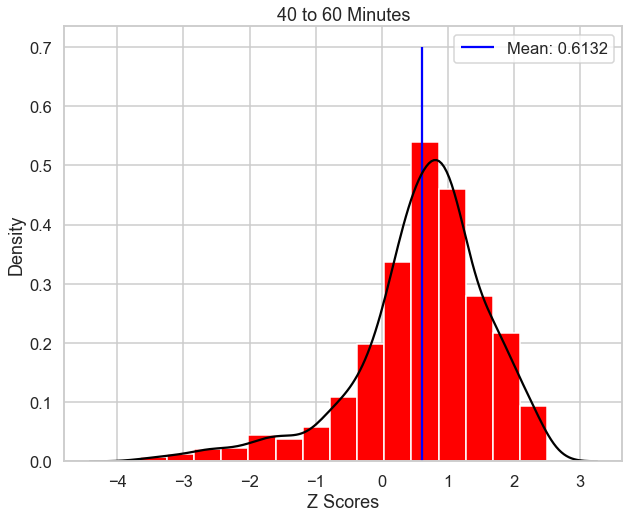

In [305]:
# visualizing above distribution as histogram
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(samp_standardized_rating, bins=15, density=True, color='r')
ax.set_xlabel('Z Scores')
ax.set_title('40 to 60 Minutes')

# applying normalized curve over histogram
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=z_mean, ymin=0, ymax=0.7, color='b', label='Mean: 0.6132')
ax.legend()

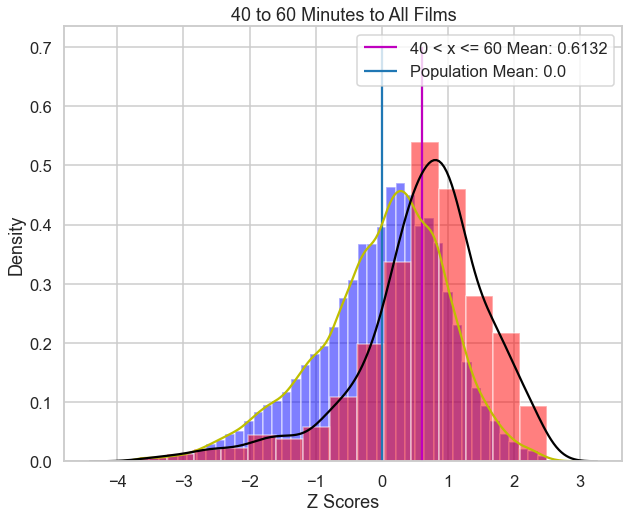

In [306]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=45, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=15, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='40 < x <= 60 Mean: 0.6132')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('40 to 60 Minutes to All Films')
plt.legend()

### Correlation

### Ho:
##### - There is no correlation between runtime and average rating for movies that are between 40 and 60 minutes. 

### Ha:
##### - There is a statistically significant correlation between runtime and average rating at the 95% level for movies that are between 40 and 60 minutes. 

In [ ]:
# r-critical value to test if found r is statistically signifcant
critical_r = 0.0529
# Source: https://www.calculators.tech/t-value-calculator
# (Unable to calculate by hand as I have been unable to find a direct formula to find this - must use either r-critical table or a r-crit calculator like the above source)
df = df_4060['Runtime'].count() - 2 # getting degrees of freedom to determine r-critical
df

In [ ]:
# calculating correlation

x = df_4060['Runtime']
y = df_4060['AverageRating']

r = x.corr(y) # result is the pearson correlation coefficient
r

print(f'Pearson Correlation: {r} | r-critical: {critical_r} | Is r greater? {abs(r) >= critical_r}')
if abs(r) >= critical_r:
    print("Reject the null")
elif abs(r) < critical_r:
    print("Fail to reject null")

In [ ]:
sns.lmplot(x="Runtime", y="AverageRating", data=df_4060, line_kws={'color': 'red'}, height=8, aspect=1.5);

### 60 to 90 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the average rating of a movie that has a runtime of between 60 minutes and 90 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the average rating of a movie that has a runtime of between 60 minutes and 90 minutes and other movies in the population.

In [47]:
# runtime sample 3 - short-mid length films (60.0001 minutes to 90 minutes)
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes AS Runtime
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) BETWEEN 60.0001 AND 90
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
ORDER BY
    mb.runtime_minutes DESC
;"""
df_6090 = pd.read_sql(q, conn)
df_6090

,movie_id,title,Runtime,genres,AverageRating,Num_Votes
0,tt0417750,Hempsters: Plant the Seed,90.0,Documentary,7.5,107
1,tt0448694,Puss in Boots,90.0,"Action,Adventure,Animation",6.6,133355
2,tt0465637,Taken by Force,90.0,"Action,Drama",7.8,33
3,tt0469021,Alan Partridge,90.0,"Action,Comedy,Crime",6.9,27986
4,tt0493076,Nina,90.0,"Biography,Drama,Music",5.3,2246
...,...,...,...,...,...,...
15614,tt8045226,Archipelago,61.0,Documentary,6.1,46
15615,tt8049858,The Wishing Forest,61.0,Fantasy,2.7,60
15616,tt8118944,My Darling Son,61.0,Documentary,9.7,32
15617,tt8869486,Roi Soleil,61.0,Action,5.6,37


In [160]:
# z-test - 60 to 90 minutes ratings run

a = 0.025

# two-tailed z-test

x_bar = df_6090['AverageRating'].mean()
n = df_6090['AverageRating'].count()
std = df_allrt['AverageRating'].std()
mu = df_allrt['AverageRating'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

Sample Mean: 5.822907996670722 | Population Mean: 6.0503090265054364 | Sample Size: 15619
p-value: 0.0 | z-score: -20.590010047517694 | Is p less than alpha? True
Reject the null


In [301]:
# normalizing distribution with for loop
samp_standardized_rating = [(x-mu)/std for x in df_6090['AverageRating']]
z_mean = np.mean(samp_standardized_rating)
print(f' Standardized Sample Mean: {z_mean}')

 Standardized Sample Mean: -0.16475171574685193


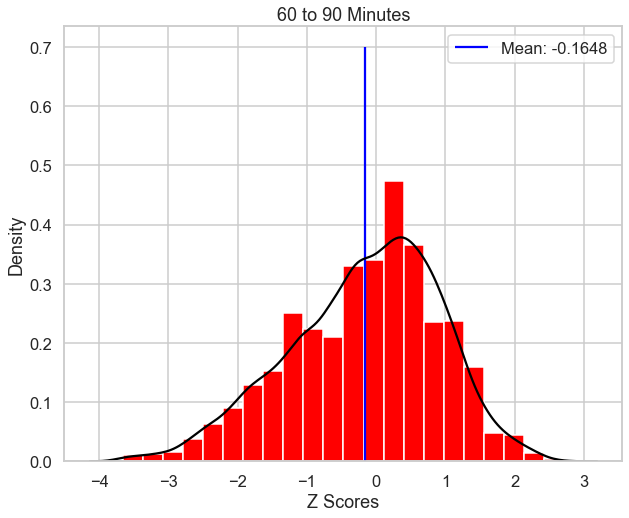

In [302]:
# visualizing above distribution as histogram
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(samp_standardized_rating, bins=22, density=True, color='r')
ax.set_xlabel('Z Scores')
ax.set_title('60 to 90 Minutes')

# applying normalized curve over histogram
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=z_mean, ymin=0, ymax=0.7, color='b', label='Mean: -0.1648')
ax.legend()

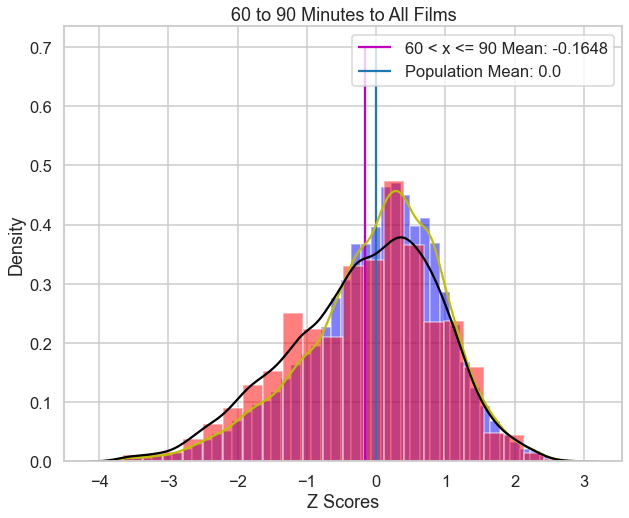

In [303]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=45, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=22, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='60 < x <= 90 Mean: -0.1648')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('60 to 90 Minutes to All Films')
plt.legend()

### Correlation

### Ho:
##### - There is no correlation between runtime and average rating for movies that are between 60 and 90 minutes. 

### Ha:
##### - There is a statistically significant correlation between runtime and average rating at the 95% level for movies that are between 60 and 90 minutes. 

In [ ]:
# r-critical value to test if found r is statistically signifcant
critical_r = 0.0132
# Source: https://www.calculators.tech/t-value-calculator
# (Unable to calculate by hand as I have been unable to find a direct formula to find this - must use either r-critical table or a r-crit calculator like the above source)
df = df_6090['Runtime'].count() - 2 # getting degrees of freedom to determine r-critical
df

In [ ]:
# calculating correlation

x = df_6090['Runtime']
y = df_6090['AverageRating']

r = x.corr(y) # result is the pearson correlation coefficient
r

print(f'Pearson Correlation: {r} | r-critical: {critical_r} | Is r greater? {abs(r) >= critical_r}')
if abs(r) >= critical_r:
    print("Reject the null")
elif abs(r) < critical_r:
    print("Fail to reject null")

In [ ]:
sns.lmplot(x="Runtime", y="AverageRating", data=df_6090, line_kws={'color': 'red'}, height=8, aspect=1.5);

### 90 to 120 Minutes Testing

### Z-Test

### Ho
##### - There is no difference between the average rating of a movie that has a runtime of between 90 minutes and 120 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the average rating of a movie that has a runtime of between 90 minutes and 120 minutes and other movies in the population.

In [52]:
# runtime sample 4 - relative average length films (90.0001 minutes to 120 minutes)
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes AS Runtime
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) BETWEEN 90.0001 AND 120
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
ORDER BY
    mb.runtime_minutes DESC
;"""
df_90120 = pd.read_sql(q, conn)
df_90120

,movie_id,title,Runtime,genres,AverageRating,Num_Votes
0,tt0926132,Road to Red,120.0,"Action,Adventure,Horror",6.7,369
1,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135
2,tt10115436,Korea: The Never-Ending War,120.0,Documentary,8.3,31
3,tt10187686,Thamaasha,120.0,Comedy,8.4,62
4,tt1024648,Argo,120.0,"Biography,Drama,Thriller",7.7,534683
...,...,...,...,...,...,...
19383,tt9203030,Loudon Wainwright III: Surviving Twin,91.0,Music,7.3,51
19384,tt9358084,The Amazing Johnathan Documentary,91.0,Documentary,8.4,44
19385,tt9397884,Seven Dinners,91.0,Comedy,5.3,126
19386,tt9598594,Üç Harfliler: Adak,91.0,"Horror,Thriller",7.2,212


In [159]:
# z-test - 90 to 120 minutes ratings run

a = 0.025

# two-tailed z-test

x_bar = df_90120['AverageRating'].mean()
n = df_90120['AverageRating'].count()
std = df_allrt['AverageRating'].std()
mu = df_allrt['AverageRating'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

Sample Mean: 6.087559315040231 | Population Mean: 6.0503090265054364 | Sample Size: 19388
p-value: 8.570688896702983e-05 | z-score: 3.7578000298737093 | Is p less than alpha? True
Reject the null


In [296]:
# normalizing distribution with for loop
samp_standardized_rating = [(x-mu)/std for x in df_90120['AverageRating']]
z_mean = np.mean(samp_standardized_rating)
print(f' Standardized Sample Mean: {z_mean}')

 Standardized Sample Mean: 0.026987779926209574


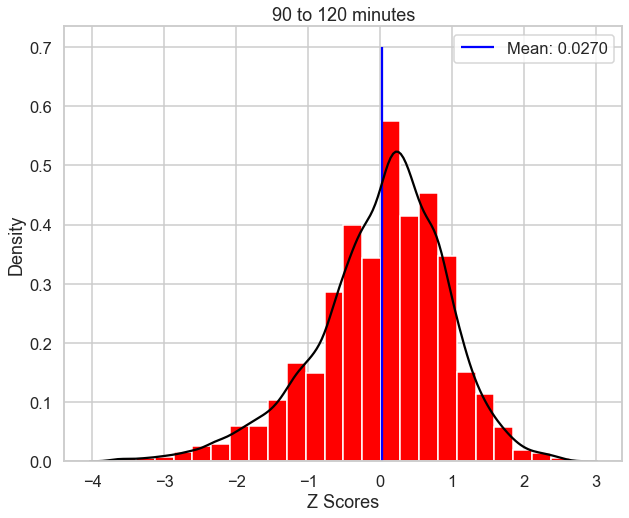

In [299]:
# visualizing above distribution as histogram
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(samp_standardized_rating, bins=24, density=True, color='r')
ax.set_xlabel('Z Scores')
ax.set_title('90 to 120 minutes')

# applying normalized curve over histogram
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=z_mean, ymin=0, ymax=0.7, color='b', label='Mean: 0.0270')
ax.legend()

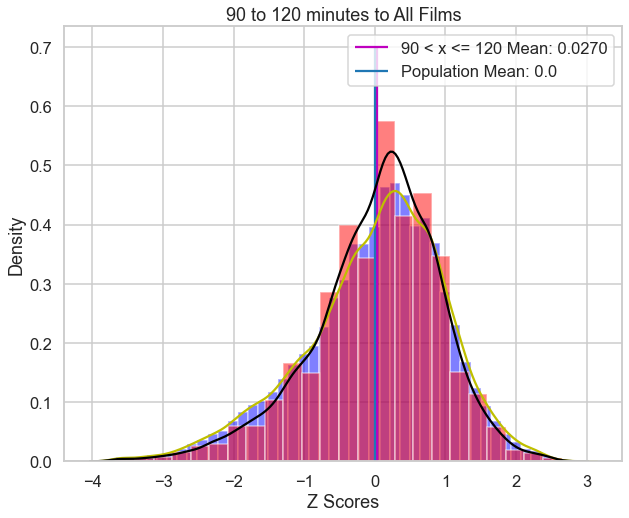

In [300]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=45, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=24, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='90 < x <= 120 Mean: 0.0270')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('90 to 120 minutes to All Films')
plt.legend()

### Correlation

### Ho:
##### - There is no correlation between runtime and average rating for movies that are between 90 and 120 minutes. 

### Ha:
##### - There is a statistically significant correlation between runtime and average rating at the 95% level for movies that are between 90 and 120 minutes. 

In [ ]:
# r-critical value to test if found r is statistically signifcant
critical_r = 0.0118
# Source: https://www.calculators.tech/t-value-calculator
# (Unable to calculate by hand as I have been unable to find a direct formula to find this - must use either r-critical table or a r-crit calculator like the above source)
df = df_90120['Runtime'].count() - 2 # getting degrees of freedom to determine r-critical
df

In [ ]:
# calculating correlation

x = df_90120['Runtime']
y = df_90120['AverageRating']

r = x.corr(y) # result is the pearson correlation coefficient
r

print(f'Pearson Correlation: {r} | r-critical: {critical_r} | Is r greater? {abs(r) >= critical_r}')
if abs(r) >= critical_r:
    print("Reject the null")
elif abs(r) < critical_r:
    print("Fail to reject null")

In [ ]:
sns.lmplot(x="Runtime", y="AverageRating", data=df_90120, line_kws={'color': 'red'}, height=8, aspect=1.5);

### 120 Minutes and Up Testing

### Z-Test

### Ho
##### - There is no difference between the average rating of a movie that has a runtime of 120 minutes or greater and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the average rating of a movie that has a runtime of 120 minutes or greater and other movies in the population at the 95% level.

In [56]:
# runtime sample 5 - long length films (120.0001 minutes and up films)
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes AS Runtime
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) BETWEEN 120.0001 AND 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
ORDER BY
    mb.runtime_minutes DESC
;"""
df_120up = pd.read_sql(q, conn)
df_120up

,movie_id,title,Runtime,genres,AverageRating,Num_Votes
0,tt5536316,National Theatre Live: Les Liaisons Dangereuses,210.0,Romance,8.3,68
1,tt1113829,George Harrison: Living in the Material World,208.0,"Biography,Documentary,Music",8.2,9372
2,tt4937126,It All Started at the End,208.0,Documentary,7.9,186
3,tt6846134,National Theatre Live: Amadeus,206.0,Musical,8.3,66
4,tt6244196,Elvis Presley: The Searcher,205.0,Documentary,7.7,902
...,...,...,...,...,...,...
4908,tt8785154,Mar Gaye Oye Loko,121.0,"Comedy,Drama,Fantasy",6.2,164
4909,tt9174410,Koodasha,121.0,"Action,Crime,Drama",7.4,242
4910,tt9176136,High End Yaariyaan,121.0,"Comedy,Drama,Family",6.0,290
4911,tt9358486,Como Novio de Pueblo,121.0,Comedy,5.4,133


In [158]:
# z-test - 120 minutes and up ratings run

a = 0.025

# two-tailed z-test

x_bar = df_120up['AverageRating'].mean()
n = df_120up['AverageRating'].count()
std = df_allrt['AverageRating'].std()
mu = df_allrt['AverageRating'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

Sample Mean: 6.450478322817015 | Population Mean: 6.0503090265054364 | Sample Size: 4913
p-value: 0.0 | z-score: 20.321448669887317 | Is p less than alpha? True
Reject the null


In [292]:
# normalizing distribution with for loop
samp_standardized_rating = [(x-mu)/std for x in df_120up['AverageRating']]
z_mean = np.mean(samp_standardized_rating)
print(f' Standardized Sample Mean: {z_mean}')

 Standardized Sample Mean: 0.28992207381146395


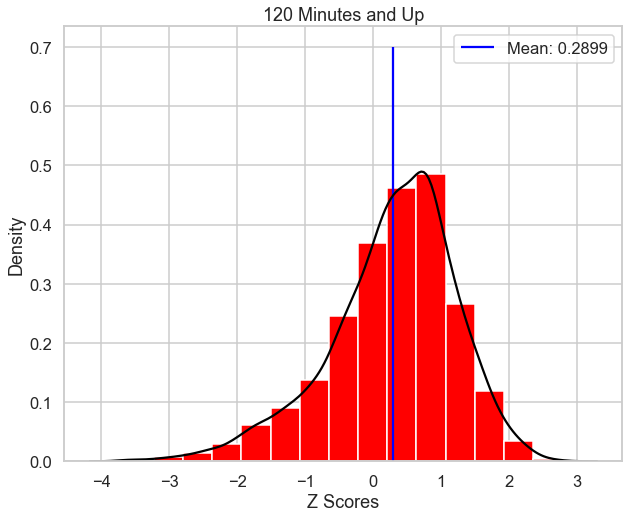

In [293]:
# visualizing above distribution as histogram
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(samp_standardized_rating, bins=15, density=True, color='r')
ax.set_xlabel('Z Scores')
ax.set_title('120 Minutes and Up')

# applying normalized curve over histogram
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=z_mean, ymin=0, ymax=0.7, color='b', label='Mean: 0.2899')
ax.legend()

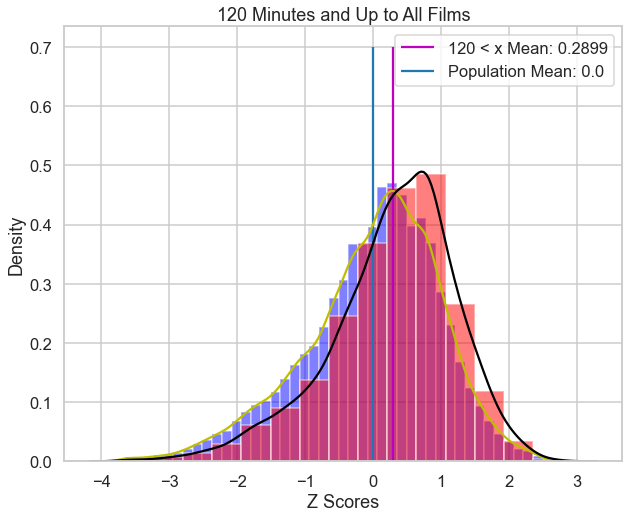

In [294]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=45, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=15, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='120 < x Mean: 0.2899')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('120 Minutes and Up to All Films')
plt.legend()

### Correlation:

##### Ho:
##### - There is no correlation between runtime and average rating for movies that are 120 minutes or longer. 

##### Ha:
##### - There is a statistically significant correlation between runtime and average rating at the 95% level for movies that are 120 minutes or longer. 

In [ ]:
# r-critical value to test if found r is statistically signifcant
critical_r = 0.0235
# Source: https://www.calculators.tech/t-value-calculator
# (Unable to calculate by hand as I have been unable to find a direct formula to find this - must use either r-critical table or a r-crit calculator like the above source)
df = df_120up['Runtime'].count() - 2 # getting degrees of freedom to determine r-critical
df

In [ ]:
# calculating correlation

x = df_120up['Runtime']
y = df_120up['AverageRating']

r = x.corr(y) # result is the pearson correlation coefficient
r

print(f'Pearson Correlation: {r} | r-critical: {critical_r} | Is r greater? {abs(r) >= critical_r}')
if abs(r) >= critical_r:
    print("Reject the null")
elif abs(r) < critical_r:
    print("Fail to reject null")

In [ ]:
# plotting the regression showing the line of best fit with slope of r
sns.lmplot(x="Runtime", y="AverageRating", data=df_120up, line_kws={'color': 'red'}, height=8, aspect=1.5);

## Conclusions from Runtime Sample Testing for Average Ratings

Z-Tests:
- For films that are less than 40 minute runtimes, we can reject the null hypothesis with a statistically significant p-value of 0.0000001193, meaning that in 95% of cases we can expect our average ratings to be higher because of this set of runtimes.
    ##### - Reject the Null
- For films that have between 40 and 60 minute runtimes, we can reject the null hypothesis with a statistically significant p-value of 0.0, meaning that in 95% of cases we can expect our average ratings to be higher because of this set of runtimes.
    ##### - Reject the Null
- For films that have between 60 and 90 minute runtimes, we can reject the null hypothesis with a statistically significant p-value of 0.0, meaning that in 95% of cases we can expect our average ratings to be lower because of this set of runtimes.
    ##### - Reject the Null
- For films that have between 90 and 120 minute runtimes, we can reject the null hypothesis with a statistically significant p-value of 0.00008571, meaning that in 95% of cases we can expect our average ratings to be higher because of this set of runtimes.
    ##### - Reject the Null
- For films that have either 120 minute runtimes or longer, we can reject the null hypothesis with a statistically significant p-value of 0.0, meaning that in 95% of cases we can expect our average ratings to be higher because of this set of runtimes.
    ##### - Reject the Null

Correlation:
- In 95% of cases, movies that 90 minutes or longer have a weak positive correlation between their runtime and their ratings. 
- In 95% of cases, movies that last between 60 and 90 minutes have a weak negative correlation between their runtime and ratings.
- For movies that are less than 60 minutes long, we cannot conclude that there is a statistically significant correlation either.

For all films less than 3.5 hours long (where we cut off movie runtimes that client would be unlikely to want to pursue), there is a statistically significant weak positive correlation between runtime and average rating of a film in 95% of cases.

### RUN CODE BELOW UNINTERRUPTED: (from Elliot's branch, remove before merge bc is unnecessary)

In [59]:
#read tmdb file, make sure values are in the same format, and drop null values
tmdb_movie_db = pd.read_csv('databases/tmdb.movies.csv', na_filter=True, na_values='[]', encoding = 'utf-8', index_col = 0)
tmdb_movie_db.dropna()
#drop extra title column
tmdb_movie_db = tmdb_movie_db.drop('original_title', axis = 1)
#standardize release date into date format
tmdb_movie_db['release_date'] = pd.to_datetime(tmdb_movie_db['release_date'])
#strip whitespace from title
tmdb_movie_db['title'] = tmdb_movie_db['title'].str.strip()
#remove duplicates
tmdb_movie_db = tmdb_movie_db.drop_duplicates()
#convert genre_ids to name
#df.where()

tmdb_movie_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,0.600,2018-06-22,Trailer Made,0.0,1


In [60]:
#read tn file, make sure values are in the same format, and drop null values
tn_movie_db = pd.read_csv('databases/tn.movie_budgets.csv', na_filter=True, na_values='[]', encoding = 'utf-8', index_col = 0)
tn_movie_db.dropna()
#standardize release date into date format
tn_movie_db['release_date'] = pd.to_datetime(tn_movie_db['release_date'])
#strip whitespace from title
tn_movie_db['movie'] = tn_movie_db['movie'].str.strip()
#strip $
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].str.strip('$')
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].str.strip('$')
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].str.strip('$')
#remove ,
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].replace(",", "", regex=True)
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].replace(",", "", regex=True)
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].replace(",", "", regex=True)
#convert to integers
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].astype(int)
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].astype(int)
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].astype(float)
#create metric ratios
tn_movie_db['dom_gross / budget'] = tn_movie_db['domestic_gross'] / tn_movie_db['production_budget']
tn_movie_db['ww_gross / budget'] = tn_movie_db['worldwide_gross'] / tn_movie_db['production_budget']
tn_movie_db['dom_profit'] = tn_movie_db['domestic_gross'] - tn_movie_db['production_budget']
tn_movie_db['profit'] = tn_movie_db['worldwide_gross'] - tn_movie_db['production_budget']

tn_movie_db

,release_date,movie,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
id,,,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2.776345e+09,1.789430,6.532577,335507625,2.351345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,0.587101,2.546673,-169536125,6.350639e+08
3,2019-06-07,Dark Phoenix,350000000,42762350,1.497624e+08,0.122178,0.427892,-307237650,-2.002376e+08
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1.403014e+09,1.388403,4.243841,128405868,1.072414e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,1.956408,4.153696,303181382,9.997217e+08
...,...,...,...,...,...,...,...,...,...
78,2018-12-31,Red 11,7000,0,0.000000e+00,0.000000,0.000000,-7000,-7.000000e+03
79,1999-04-02,Following,6000,48482,2.404950e+05,8.080333,40.082500,42482,2.344950e+05
80,2005-07-13,Return to the Land of Wonders,5000,1338,1.338000e+03,0.267600,0.267600,-3662,-3.662000e+03


In [61]:
#merge title and movie name
tn_movie_db = tn_movie_db.rename(columns = {"movie":"title"})

#special cases where movie titles do not match
tn_movie_db['title'].replace({'Harry Potter and the Deathly Hallows: Part I' : 'Harry Potter and the Deathly Hallows: Part 1'}, inplace=True)
tn_movie_db['title'].replace({'Harry Potter and the Deathly Hallows: Part II' : 'Harry Potter and the Deathly Hallows: Part 2'}, inplace=True)
tmdb_movie_db['title'].replace({'Fast & Furious 6':'Fast and Furious 6'}, inplace=True)
tn_movie_db['title'].replace({'Star Wars: The Force Awakens' : 'Star Wars Ep. VII: The Force Awakens'}, inplace=True)
tn_movie_db['title'].replace({'Star Wars: The Last Jedi' : 'Star Wars Ep. VIII: The Last Jedi'}, inplace=True)

#merge databases
movie_db = tmdb_movie_db.merge(tn_movie_db, how = 'left')

#drop null values
movie_db = movie_db.dropna()

movie_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,125000000.0,296131568.0,960431568.0,2.369053,7.683453,171131568.0,835431568.0
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,165000000.0,217581232.0,494870992.0,1.318674,2.999218,52581232.0,329870992.0
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,170000000.0,312433331.0,621156389.0,1.837843,3.653861,142433331.0,451156389.0
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174,30000000.0,191796233.0,364545516.0,6.393208,12.151517,161796233.0,334545516.0
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186,160000000.0,292576195.0,835524642.0,1.828601,5.222029,132576195.0,675524642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23711,"[53, 18, 27]",510284,en,5.972,2019-02-01,Braid,6.4,18,1660000.0,0.0,80745.0,0.000000,0.048642,-1660000.0,-1579255.0
23747,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.300525,1.329002,811417.0,888305.0
23795,"[18, 28, 80]",547590,en,5.274,2019-05-03,El Chicano,9.0,1,8000000.0,700261.0,700261.0,0.087533,0.087533,-7299739.0,-7299739.0
23907,"[18, 35, 28, 80]",506971,ur,4.486,2018-07-20,Teefa in Trouble,7.6,11,1500000.0,0.0,98806.0,0.000000,0.065871,-1500000.0,-1401194.0


In [62]:
#remove values that have 0 in the domestic_gross column
new_movie_db = movie_db.drop(movie_db[movie_db['domestic_gross'] < 1].index)
new_movie_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,125000000.0,296131568.0,960431568.0,2.369053,7.683453,171131568.0,835431568.0
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,165000000.0,217581232.0,494870992.0,1.318674,2.999218,52581232.0,329870992.0
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,170000000.0,312433331.0,621156389.0,1.837843,3.653861,142433331.0,451156389.0
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174,30000000.0,191796233.0,364545516.0,6.393208,12.151517,161796233.0,334545516.0
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186,160000000.0,292576195.0,835524642.0,1.828601,5.222029,132576195.0,675524642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23582,"[28, 16, 14, 12, 35, 878]",503314,ja,6.868,2019-01-16,Dragon Ball Super: Broly,7.4,721,8500000.0,30376755.0,122747755.0,3.573736,14.440912,21876755.0,114247755.0
23687,"[16, 12, 10751, 36, 10752]",433694,en,6.107,2018-04-13,Sgt. Stubby: An American Hero,6.4,9,25000000.0,3054285.0,3645957.0,0.122171,0.145838,-21945715.0,-21354043.0
23747,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.300525,1.329002,811417.0,888305.0
23795,"[18, 28, 80]",547590,en,5.274,2019-05-03,El Chicano,9.0,1,8000000.0,700261.0,700261.0,0.087533,0.087533,-7299739.0,-7299739.0


In [63]:
new_movie_db.duplicated('title').value_counts()

False    1203
True        2
dtype: int64

In [64]:
new_movie_db = new_movie_db.drop_duplicates(subset='title')
new_movie_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,125000000.0,296131568.0,960431568.0,2.369053,7.683453,171131568.0,835431568.0
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,165000000.0,217581232.0,494870992.0,1.318674,2.999218,52581232.0,329870992.0
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,170000000.0,312433331.0,621156389.0,1.837843,3.653861,142433331.0,451156389.0
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174,30000000.0,191796233.0,364545516.0,6.393208,12.151517,161796233.0,334545516.0
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186,160000000.0,292576195.0,835524642.0,1.828601,5.222029,132576195.0,675524642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23582,"[28, 16, 14, 12, 35, 878]",503314,ja,6.868,2019-01-16,Dragon Ball Super: Broly,7.4,721,8500000.0,30376755.0,122747755.0,3.573736,14.440912,21876755.0,114247755.0
23687,"[16, 12, 10751, 36, 10752]",433694,en,6.107,2018-04-13,Sgt. Stubby: An American Hero,6.4,9,25000000.0,3054285.0,3645957.0,0.122171,0.145838,-21945715.0,-21354043.0
23747,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.300525,1.329002,811417.0,888305.0
23795,"[18, 28, 80]",547590,en,5.274,2019-05-03,El Chicano,9.0,1,8000000.0,700261.0,700261.0,0.087533,0.087533,-7299739.0,-7299739.0


#### Domestic Revenue per Rating Table 
- Merging on title

In [65]:
#determine outliers
p25 = np.percentile(new_movie_db['domestic_gross'], 25)
p75 = np.percentile(new_movie_db['domestic_gross'], 75)
iqr = p75 - p25
outlier = p75 + (1.5 * iqr)
#create db that removes outliers
dr_movie_db = new_movie_db.drop(new_movie_db[new_movie_db['domestic_gross'] > outlier].index)
dr_movie_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
20,"[28, 18, 9648, 53]",2501,en,17.935,2002-06-14,The Bourne Identity,7.4,5406,60000000.0,121468960.0,214357371.0,2.024483,3.572623,61468960.0,154357371.0
21,"[28, 35]",37834,en,17.713,2010-06-23,Knight and Day,6.0,2494,117000000.0,76423035.0,258751370.0,0.653188,2.211550,-40576965.0,141751370.0
22,"[12, 10751, 14]",10140,en,17.382,2010-12-10,The Chronicles of Narnia: The Voyage of the Da...,6.3,3196,155000000.0,104386950.0,418186950.0,0.673464,2.697980,-50613050.0,263186950.0
23,"[18, 10749]",41233,en,17.174,2010-08-06,Step Up 3D,6.7,1160,30000000.0,42400223.0,165889117.0,1.413341,5.529637,12400223.0,135889117.0
24,"[53, 28, 12, 35, 80]",34544,en,17.097,2010-06-11,The A-Team,6.3,2703,110000000.0,77222099.0,177241171.0,0.702019,1.611283,-32777901.0,67241171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23582,"[28, 16, 14, 12, 35, 878]",503314,ja,6.868,2019-01-16,Dragon Ball Super: Broly,7.4,721,8500000.0,30376755.0,122747755.0,3.573736,14.440912,21876755.0,114247755.0
23687,"[16, 12, 10751, 36, 10752]",433694,en,6.107,2018-04-13,Sgt. Stubby: An American Hero,6.4,9,25000000.0,3054285.0,3645957.0,0.122171,0.145838,-21945715.0,-21354043.0
23747,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.300525,1.329002,811417.0,888305.0
23795,"[18, 28, 80]",547590,en,5.274,2019-05-03,El Chicano,9.0,1,8000000.0,700261.0,700261.0,0.087533,0.087533,-7299739.0,-7299739.0


In [66]:
# merging dr_movie_db with the sql database data
domgross_im_db = dr_movie_db.merge(df_allrt,how='inner',on='title')
domgross_im_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit,movie_id,Runtime,genres,AverageRating,Num_Votes
0,"[28, 35]",37834,en,17.713,2010-06-23,Knight and Day,6.0,2494,117000000.0,76423035.0,258751370.0,0.653188,2.211550,-40576965.0,141751370.0,tt1013743,109.0,"Action,Adventure,Comedy",6.3,169840
1,"[12, 10751, 14]",10140,en,17.382,2010-12-10,The Chronicles of Narnia: The Voyage of the Da...,6.3,3196,155000000.0,104386950.0,418186950.0,0.673464,2.697980,-50613050.0,263186950.0,tt0980970,113.0,"Adventure,Family,Fantasy",6.3,129663
2,"[18, 10749]",41233,en,17.174,2010-08-06,Step Up 3D,6.7,1160,30000000.0,42400223.0,165889117.0,1.413341,5.529637,12400223.0,135889117.0,tt1193631,107.0,"Drama,Music,Romance",6.2,53081
3,"[53, 28, 12, 35, 80]",34544,en,17.097,2010-06-11,The A-Team,6.3,2703,110000000.0,77222099.0,177241171.0,0.702019,1.611283,-32777901.0,67241171.0,tt0429493,117.0,"Action,Adventure,Thriller",6.8,235256
4,"[28, 12, 10751, 14]",10196,en,16.595,2010-07-01,The Last Airbender,4.6,2143,150000000.0,131772187.0,319713881.0,0.878481,2.131426,-18227813.0,169713881.0,tt0938283,103.0,"Action,Adventure,Family",4.1,137734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,"[16, 12, 10751, 36, 10752]",433694,en,6.107,2018-04-13,Sgt. Stubby: An American Hero,6.4,9,25000000.0,3054285.0,3645957.0,0.122171,0.145838,-21945715.0,-21354043.0,tt5314190,84.0,"Adventure,Animation,Family",6.9,1225
1164,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.300525,1.329002,811417.0,888305.0,tt6512428,119.0,"Drama,War",5.6,812
1165,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.300525,1.329002,811417.0,888305.0,tt5259496,100.0,Drama,7.1,901
1166,"[18, 28, 80]",547590,en,5.274,2019-05-03,El Chicano,9.0,1,8000000.0,700261.0,700261.0,0.087533,0.087533,-7299739.0,-7299739.0,tt7374952,108.0,Drama,5.7,290


In [67]:
# checking for unintentionally duplicated values
domgross_im_db.duplicated('title').value_counts() 

False    1042
True      126
dtype: int64

In [68]:
# dropping found unintentionally duplicated values
domgross_im_db = domgross_im_db.drop_duplicates(subset='title')
domgross_im_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit,movie_id,Runtime,genres,AverageRating,Num_Votes
0,"[28, 35]",37834,en,17.713,2010-06-23,Knight and Day,6.0,2494,117000000.0,76423035.0,258751370.0,0.653188,2.211550,-40576965.0,141751370.0,tt1013743,109.0,"Action,Adventure,Comedy",6.3,169840
1,"[12, 10751, 14]",10140,en,17.382,2010-12-10,The Chronicles of Narnia: The Voyage of the Da...,6.3,3196,155000000.0,104386950.0,418186950.0,0.673464,2.697980,-50613050.0,263186950.0,tt0980970,113.0,"Adventure,Family,Fantasy",6.3,129663
2,"[18, 10749]",41233,en,17.174,2010-08-06,Step Up 3D,6.7,1160,30000000.0,42400223.0,165889117.0,1.413341,5.529637,12400223.0,135889117.0,tt1193631,107.0,"Drama,Music,Romance",6.2,53081
3,"[53, 28, 12, 35, 80]",34544,en,17.097,2010-06-11,The A-Team,6.3,2703,110000000.0,77222099.0,177241171.0,0.702019,1.611283,-32777901.0,67241171.0,tt0429493,117.0,"Action,Adventure,Thriller",6.8,235256
4,"[28, 12, 10751, 14]",10196,en,16.595,2010-07-01,The Last Airbender,4.6,2143,150000000.0,131772187.0,319713881.0,0.878481,2.131426,-18227813.0,169713881.0,tt0938283,103.0,"Action,Adventure,Family",4.1,137734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,"[28, 16, 14, 12, 35, 878]",503314,ja,6.868,2019-01-16,Dragon Ball Super: Broly,7.4,721,8500000.0,30376755.0,122747755.0,3.573736,14.440912,21876755.0,114247755.0,tt7961060,100.0,"Action,Adventure,Animation",8.0,16465
1163,"[16, 12, 10751, 36, 10752]",433694,en,6.107,2018-04-13,Sgt. Stubby: An American Hero,6.4,9,25000000.0,3054285.0,3645957.0,0.122171,0.145838,-21945715.0,-21354043.0,tt5314190,84.0,"Adventure,Animation,Family",6.9,1225
1164,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.300525,1.329002,811417.0,888305.0,tt6512428,119.0,"Drama,War",5.6,812
1166,"[18, 28, 80]",547590,en,5.274,2019-05-03,El Chicano,9.0,1,8000000.0,700261.0,700261.0,0.087533,0.087533,-7299739.0,-7299739.0,tt7374952,108.0,Drama,5.7,290


### Hypothesis for Runtime and Domestic Gross Revenue

### Less than 40 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the domestic revenue of a movie that has a runtime of less than 40 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the domestic revenue of a movie that has a runtime of less than 40 minutes and the population. 

In [140]:
# pulling sample based on runtime from combined data
domgross_40_db = domgross_im_db.loc[domgross_im_db['Runtime'] <= 40]
domgross_40_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit,movie_id,Runtime,genres,AverageRating,Num_Votes


##### Unable to perform z-test for this as there are no rows in sample for this range.

### 40 to 60 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the domestic revenue of a movie that has a runtime of between 40 minutes and 60 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the domestic revenue of a movie that has a runtime of between 40 minutes and 60 minutes and other movies in the population.

In [76]:
# pulling sample based on runtime from combined data
domgross_4060_db = domgross_im_db.loc[(domgross_im_db['Runtime'] > 40) & (domgross_im_db['Runtime'] <= 60)]
domgross_4060_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit,movie_id,Runtime,genres,AverageRating,Num_Votes


##### Unable to perform z-test for this as there are no rows in sample for this range.

### 60 to 90 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the domestic revenue of a movie that has a runtime of between 60 minutes and 90 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the domestic revenue of a movie that has a runtime of between 60 minutes and 90 minutes and other movies in the population.

In [75]:
# pulling sample based on runtime from combined data
domgross_6090_db = domgross_im_db.loc[(domgross_im_db['Runtime'] > 60) & (domgross_im_db['Runtime'] <= 90)]
domgross_6090_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit,movie_id,Runtime,genres,AverageRating,Num_Votes
17,"[28, 37, 18, 14, 53]",20533,en,13.467,2010-06-18,Jonah Hex,4.6,708,47000000.0,10547117.0,11022696.0,0.224407,0.234525,-36452883.0,-35977304.0,tt1075747,81.0,"Action,Drama,Fantasy",4.7,51860
33,"[35, 27]",43593,en,11.302,2010-08-20,Piranha 3D,5.3,1029,24000000.0,25003155.0,83660160.0,1.041798,3.485840,1003155.0,59660160.0,tt0464154,88.0,"Comedy,Horror",5.4,81327
37,"[35, 12, 10751, 14]",38745,en,10.768,2010-12-25,Gulliver's Travels,5.1,1282,112000000.0,42779261.0,232017848.0,0.381958,2.071588,-69220739.0,120017848.0,tt1320261,85.0,"Adventure,Comedy,Family",4.9,61178
42,"[35, 10751, 28, 14]",39691,en,10.544,2010-07-30,Cats & Dogs: The Revenge of Kitty Galore,4.9,273,85000000.0,43585753.0,113026383.0,0.512774,1.329722,-41414247.0,28026383.0,tt1287468,82.0,"Action,Comedy,Family",4.3,12642
47,"[27, 9648, 53]",44040,en,10.203,2010-09-17,Devil,5.9,1516,10000000.0,33679655.0,63354114.0,3.367965,6.335411,23679655.0,53354114.0,tt1314655,80.0,"Horror,Mystery,Thriller",6.2,122080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,"[10749, 16, 35, 10751, 14, 9648, 12]",370567,en,12.987,2018-03-23,Sherlock Gnomes,5.4,343,59000000.0,43242871.0,87527651.0,0.732930,1.483520,-15757129.0,28527651.0,tt2296777,86.0,"Adventure,Animation,Comedy",5.1,8030
1146,[27],429476,en,12.955,2018-09-28,Hell Fest,5.5,273,5500000.0,11107431.0,18119231.0,2.019533,3.294406,5607431.0,12619231.0,tt1999890,89.0,Horror,5.5,8662
1148,"[35, 18]",454283,en,12.840,2018-06-01,Action Point,5.2,136,19000000.0,5059608.0,5103675.0,0.266295,0.268614,-13940392.0,-13896325.0,tt6495770,85.0,Comedy,5.0,6657
1159,"[53, 28, 80]",442064,en,9.371,2018-01-12,Proud Mary,5.5,259,30000000.0,20868638.0,21709539.0,0.695621,0.723651,-9131362.0,-8290461.0,tt6421110,89.0,"Action,Crime,Drama",4.9,6805


In [156]:
# z-test - 60 minutes to 90 minutes domestic revenue run

a = 0.025

# two-tailed z-test
x_bar = domgross_6090_db['domestic_gross'].mean()
n = domgross_6090_db['domestic_gross'].count()
std = domgross_im_db['domestic_gross'].std()
mu = domgross_im_db['domestic_gross'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

Sample Mean: 29003467.6302521 | Population Mean: 39144714.540307105 | Sample Size: 119
p-value: 0.002555967585701535 | z-score: -2.799894240864699 | Is p less than alpha? True
Reject the null


### 90 to 120 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the domestic revenue of a movie that has a runtime of between 90 minutes and 120 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the domestic revenue of a movie that has a runtime of between 90 minutes and 120 minutes and other movies in the population.

In [119]:
# pulling sample based on runtime from combined data
domgross_90120_db = domgross_im_db.loc[(domgross_im_db['Runtime'] > 90) & (domgross_im_db['Runtime'] <= 120)]
domgross_90120_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit,movie_id,Runtime,genres,AverageRating,Num_Votes
0,"[28, 35]",37834,en,17.713,2010-06-23,Knight and Day,6.0,2494,117000000.0,76423035.0,258751370.0,0.653188,2.211550,-40576965.0,141751370.0,tt1013743,109.0,"Action,Adventure,Comedy",6.3,169840
1,"[12, 10751, 14]",10140,en,17.382,2010-12-10,The Chronicles of Narnia: The Voyage of the Da...,6.3,3196,155000000.0,104386950.0,418186950.0,0.673464,2.697980,-50613050.0,263186950.0,tt0980970,113.0,"Adventure,Family,Fantasy",6.3,129663
2,"[18, 10749]",41233,en,17.174,2010-08-06,Step Up 3D,6.7,1160,30000000.0,42400223.0,165889117.0,1.413341,5.529637,12400223.0,135889117.0,tt1193631,107.0,"Drama,Music,Romance",6.2,53081
3,"[53, 28, 12, 35, 80]",34544,en,17.097,2010-06-11,The A-Team,6.3,2703,110000000.0,77222099.0,177241171.0,0.702019,1.611283,-32777901.0,67241171.0,tt0429493,117.0,"Action,Adventure,Thriller",6.8,235256
4,"[28, 12, 10751, 14]",10196,en,16.595,2010-07-01,The Last Airbender,4.6,2143,150000000.0,131772187.0,319713881.0,0.878481,2.131426,-18227813.0,169713881.0,tt0938283,103.0,"Action,Adventure,Family",4.1,137734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,"[28, 878, 53]",513324,en,7.544,2018-05-11,Higher Power,4.9,43,500000.0,528.0,528.0,0.001056,0.001056,-499472.0,-499472.0,tt2924392,93.0,"Action,Sci-Fi,Thriller",5.3,2152
1162,"[28, 16, 14, 12, 35, 878]",503314,ja,6.868,2019-01-16,Dragon Ball Super: Broly,7.4,721,8500000.0,30376755.0,122747755.0,3.573736,14.440912,21876755.0,114247755.0,tt7961060,100.0,"Action,Adventure,Animation",8.0,16465
1164,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.300525,1.329002,811417.0,888305.0,tt6512428,119.0,"Drama,War",5.6,812
1166,"[18, 28, 80]",547590,en,5.274,2019-05-03,El Chicano,9.0,1,8000000.0,700261.0,700261.0,0.087533,0.087533,-7299739.0,-7299739.0,tt7374952,108.0,Drama,5.7,290


In [157]:
# z-test - 90 minutes to 120 minutes domestic revenue run

a = 0.025

# two-tailed z-test
x_bar = domgross_90120_db['domestic_gross'].mean()
n = domgross_90120_db['domestic_gross'].count()
std = domgross_im_db['domestic_gross'].std()
mu = domgross_im_db['domestic_gross'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

Sample Mean: 37333690.29861111 | Population Mean: 39144714.540307105 | Sample Size: 720
p-value: 0.10936860275446902 | z-score: -1.2298929208551865 | Is p less than alpha? False
Fail to reject null


### 120 Minutes and Up Testing

### Z-Test

### Ho:
##### - There is no difference between the domestic revenue of a movie that has a runtime of 120 minutes or greater and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the domestic revenue of a movie that has a runtime of 120 minutes or greater and other movies in the population at the 95% level.

In [124]:
# pulling sample based on runtime from combined data
domgross_120up_db = domgross_im_db.loc[domgross_im_db['Runtime'] > 120]
domgross_120up_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit,movie_id,Runtime,genres,AverageRating,Num_Votes
6,"[28, 12, 18]",20662,en,15.444,2010-05-14,Robin Hood,6.3,2569,210000000.0,105487148.0,322459006.0,0.502320,1.535519,-104512852.0,112459006.0,tt0955308,140.0,"Action,Adventure,Drama",6.6,239480
16,"[80, 18, 53]",23168,en,13.476,2010-09-17,The Town,7.1,2386,37000000.0,92186262.0,152566881.0,2.491521,4.123429,55186262.0,115566881.0,tt0840361,125.0,"Crime,Drama,Thriller",7.6,322524
35,"[10749, 18, 53, 80]",43539,en,11.147,2010-11-19,The Next Three Days,7.0,1469,30000000.0,21148651.0,67255916.0,0.704955,2.241864,-8851349.0,37255916.0,tt1458175,133.0,"Action,Crime,Drama",7.4,168066
44,"[28, 35, 53, 10749]",37821,en,10.221,2010-06-04,Killers,5.8,1314,75000000.0,47059963.0,95572749.0,0.627466,1.274303,-27940037.0,20572749.0,tt2409300,137.0,"Action,Crime,Drama",6.5,4472
55,"[35, 18, 10749]",37786,en,9.986,2010-05-27,Sex and the City 2,5.9,809,95000000.0,95347692.0,294680778.0,1.003660,3.101903,347692.0,199680778.0,tt1261945,146.0,"Comedy,Drama,Romance",4.4,69199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,"[53, 80, 18, 28]",471507,en,17.815,2018-12-25,Destroyer,5.9,176,9000000.0,1533324.0,3681096.0,0.170369,0.409011,-7466676.0,-5318904.0,tt7137380,121.0,"Action,Crime,Drama",6.2,13683
1120,"[27, 14]",361292,en,16.925,2018-10-26,Suspiria,7.0,752,20000000.0,2483472.0,7034615.0,0.124174,0.351731,-17516528.0,-12965385.0,tt1034415,152.0,"Fantasy,Horror,Mystery",6.8,37360
1126,"[18, 36]",457136,en,16.115,2018-12-07,Mary Queen of Scots,6.6,592,25000000.0,16468499.0,46734733.0,0.658740,1.869389,-8531501.0,21734733.0,tt2328900,124.0,"Biography,Drama,History",6.3,23866
1137,"[35, 18, 37]",440161,en,13.738,2018-09-21,The Sisters Brothers,7.0,590,38000000.0,3143056.0,13143056.0,0.082712,0.345870,-34856944.0,-24856944.0,tt4971344,122.0,"Adventure,Comedy,Crime",7.0,32135


In [155]:
# z-test - 120 minutes and up domestic revenue run

a = 0.025

# two-tailed z-test
x_bar = domgross_120up_db['domestic_gross'].mean()
n = domgross_120up_db['domestic_gross'].count()
std = domgross_im_db['domestic_gross'].std()
mu = domgross_im_db['domestic_gross'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

Sample Mean: 51512920.63054187 | Population Mean: 39144714.540307105 | Sample Size: 203
p-value: 4.098637876537303e-06 | z-score: 4.459965734545205 | Is p less than alpha? True
Reject the null


### Correlation

### Ho:
##### - There is no correlation between runtime and the domestic gross revenue for a given movie at the 95% level.  

### Ha:
##### - There is a statistically significant correlation between runtime and the domestic gross revenue at the 95% level for a given movie.

In [ ]:
# r-critical value to test if found r is statistically signifcant
critical_r = 0.0510
# Source: https://www.calculators.tech/t-value-calculator
# (Unable to calculate by hand as I have been unable to find a direct formula to find this - must use either r-critical table or a r-crit calculator like the above source)
df = domgross_im_db['Runtime'].count() - 2 # getting degrees of freedom to determine r-critical
df

In [ ]:
# calculating correlation

x = domgross_im_db['Runtime']
y = domgross_im_db['domestic_gross']

r = x.corr(y) # result is the pearson correlation coefficient
r

print(f'Pearson Correlation: {r} | r-critical: {critical_r} | Is r greater? {abs(r) >= critical_r}')
if abs(r) >= critical_r:
    print("Reject the null")
elif abs(r) < critical_r:
    print("Fail to reject null")

In [ ]:
sns.lmplot(x="Runtime", y="domestic_gross", data=domgross_im_db, line_kws={'color': 'red'}, height=8, aspect=1.5);

#### Worldwide Revenue per Rating

In [126]:
#determine outliers
p25 = np.percentile(new_movie_db['worldwide_gross'], 25)
p75 = np.percentile(new_movie_db['worldwide_gross'], 75)
iqr = p75 - p25
outlier = p75 + (1.5 * iqr)
#create db that removes outliers
wwr_movie_db = new_movie_db.drop(new_movie_db[new_movie_db['worldwide_gross'] > outlier].index)
wwr_movie_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174,30000000.0,191796233.0,364545516.0,6.393208,12.151517,161796233.0,334545516.0
18,"[28, 18, 53]",2502,en,18.199,2004-07-23,The Bourne Supremacy,7.3,4367,85000000.0,176087450.0,311001124.0,2.071617,3.658837,91087450.0,226001124.0
20,"[28, 18, 9648, 53]",2501,en,17.935,2002-06-14,The Bourne Identity,7.4,5406,60000000.0,121468960.0,214357371.0,2.024483,3.572623,61468960.0,154357371.0
21,"[28, 35]",37834,en,17.713,2010-06-23,Knight and Day,6.0,2494,117000000.0,76423035.0,258751370.0,0.653188,2.211550,-40576965.0,141751370.0
23,"[18, 10749]",41233,en,17.174,2010-08-06,Step Up 3D,6.7,1160,30000000.0,42400223.0,165889117.0,1.413341,5.529637,12400223.0,135889117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23582,"[28, 16, 14, 12, 35, 878]",503314,ja,6.868,2019-01-16,Dragon Ball Super: Broly,7.4,721,8500000.0,30376755.0,122747755.0,3.573736,14.440912,21876755.0,114247755.0
23687,"[16, 12, 10751, 36, 10752]",433694,en,6.107,2018-04-13,Sgt. Stubby: An American Hero,6.4,9,25000000.0,3054285.0,3645957.0,0.122171,0.145838,-21945715.0,-21354043.0
23747,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.300525,1.329002,811417.0,888305.0
23795,"[18, 28, 80]",547590,en,5.274,2019-05-03,El Chicano,9.0,1,8000000.0,700261.0,700261.0,0.087533,0.087533,-7299739.0,-7299739.0


In [127]:
# merging dr_movie_db with the sql database data
wwgross_im_db = wwr_movie_db.merge(df_allrt,how='inner',on='title')
wwgross_im_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit,movie_id,Runtime,genres,AverageRating,Num_Votes
0,"[28, 35]",37834,en,17.713,2010-06-23,Knight and Day,6.0,2494,117000000.0,76423035.0,258751370.0,0.653188,2.211550,-40576965.0,141751370.0,tt1013743,109.0,"Action,Adventure,Comedy",6.3,169840
1,"[18, 10749]",41233,en,17.174,2010-08-06,Step Up 3D,6.7,1160,30000000.0,42400223.0,165889117.0,1.413341,5.529637,12400223.0,135889117.0,tt1193631,107.0,"Drama,Music,Romance",6.2,53081
2,"[53, 28, 12, 35, 80]",34544,en,17.097,2010-06-11,The A-Team,6.3,2703,110000000.0,77222099.0,177241171.0,0.702019,1.611283,-32777901.0,67241171.0,tt0429493,117.0,"Action,Adventure,Thriller",6.8,235256
3,"[28, 12, 10751, 14]",10196,en,16.595,2010-07-01,The Last Airbender,4.6,2143,150000000.0,131772187.0,319713881.0,0.878481,2.131426,-18227813.0,169713881.0,tt0938283,103.0,"Action,Adventure,Family",4.1,137734
4,[18],37799,en,15.889,2010-10-01,The Social Network,7.2,6116,40000000.0,96962694.0,224922135.0,2.424067,5.623053,56962694.0,184922135.0,tt1285016,120.0,"Biography,Drama",7.7,568578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,"[16, 12, 10751, 36, 10752]",433694,en,6.107,2018-04-13,Sgt. Stubby: An American Hero,6.4,9,25000000.0,3054285.0,3645957.0,0.122171,0.145838,-21945715.0,-21354043.0,tt5314190,84.0,"Adventure,Animation,Family",6.9,1225
1152,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.300525,1.329002,811417.0,888305.0,tt6512428,119.0,"Drama,War",5.6,812
1153,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.300525,1.329002,811417.0,888305.0,tt5259496,100.0,Drama,7.1,901
1154,"[18, 28, 80]",547590,en,5.274,2019-05-03,El Chicano,9.0,1,8000000.0,700261.0,700261.0,0.087533,0.087533,-7299739.0,-7299739.0,tt7374952,108.0,Drama,5.7,290


In [128]:
# checking for unintentionally duplicated values
wwgross_im_db.duplicated('title').value_counts() 

False    1023
True      133
dtype: int64

In [129]:
# dropping found unintentionally duplicated values
wwgross_im_db = wwgross_im_db.drop_duplicates(subset='title')
wwgross_im_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit,movie_id,Runtime,genres,AverageRating,Num_Votes
0,"[28, 35]",37834,en,17.713,2010-06-23,Knight and Day,6.0,2494,117000000.0,76423035.0,258751370.0,0.653188,2.211550,-40576965.0,141751370.0,tt1013743,109.0,"Action,Adventure,Comedy",6.3,169840
1,"[18, 10749]",41233,en,17.174,2010-08-06,Step Up 3D,6.7,1160,30000000.0,42400223.0,165889117.0,1.413341,5.529637,12400223.0,135889117.0,tt1193631,107.0,"Drama,Music,Romance",6.2,53081
2,"[53, 28, 12, 35, 80]",34544,en,17.097,2010-06-11,The A-Team,6.3,2703,110000000.0,77222099.0,177241171.0,0.702019,1.611283,-32777901.0,67241171.0,tt0429493,117.0,"Action,Adventure,Thriller",6.8,235256
3,"[28, 12, 10751, 14]",10196,en,16.595,2010-07-01,The Last Airbender,4.6,2143,150000000.0,131772187.0,319713881.0,0.878481,2.131426,-18227813.0,169713881.0,tt0938283,103.0,"Action,Adventure,Family",4.1,137734
4,[18],37799,en,15.889,2010-10-01,The Social Network,7.2,6116,40000000.0,96962694.0,224922135.0,2.424067,5.623053,56962694.0,184922135.0,tt1285016,120.0,"Biography,Drama",7.7,568578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,"[28, 16, 14, 12, 35, 878]",503314,ja,6.868,2019-01-16,Dragon Ball Super: Broly,7.4,721,8500000.0,30376755.0,122747755.0,3.573736,14.440912,21876755.0,114247755.0,tt7961060,100.0,"Action,Adventure,Animation",8.0,16465
1151,"[16, 12, 10751, 36, 10752]",433694,en,6.107,2018-04-13,Sgt. Stubby: An American Hero,6.4,9,25000000.0,3054285.0,3645957.0,0.122171,0.145838,-21945715.0,-21354043.0,tt5314190,84.0,"Adventure,Animation,Family",6.9,1225
1152,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.300525,1.329002,811417.0,888305.0,tt6512428,119.0,"Drama,War",5.6,812
1154,"[18, 28, 80]",547590,en,5.274,2019-05-03,El Chicano,9.0,1,8000000.0,700261.0,700261.0,0.087533,0.087533,-7299739.0,-7299739.0,tt7374952,108.0,Drama,5.7,290


In [134]:
wwgross_im_db['Runtime'].min()

73.0

### Hypothesis Testing for Runtime and Worldwide Gross Revenue

### Less than 40 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the worldwide revenue of a movie that has a runtime of less than 40 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the worldwide revenue of a movie that has a runtime of less than 40 minutes and the population. 

In [142]:
wwgross_40_db = wwgross_im_db.loc[wwgross_im_db['Runtime'] <= 40]
wwgross_40_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit,movie_id,Runtime,genres,AverageRating,Num_Votes


##### Unable to perform z-test for this as there are no rows in sample for this range.

### 40 to 60 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the worldwide revenue of a movie that has a runtime of between 40 minutes and 60 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the worldwide revenue of a movie that has a runtime of between 40 minutes and 60 minutes and other movies in the population.

In [143]:
wwgross_4060_db = wwgross_im_db.loc[(wwgross_im_db['Runtime'] > 40) & (wwgross_im_db['Runtime'] <= 60)]
wwgross_4060_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit,movie_id,Runtime,genres,AverageRating,Num_Votes


##### Unable to perform z-test for this as there are no rows in sample for this range.

### 60 to 90 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the worldwide revenue of a movie that has a runtime of between 60 minutes and 90 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the worldwide revenue of a movie that has a runtime of between 60 minutes and 90 minutes and other movies in the population.

In [144]:
wwgross_6090_db = wwgross_im_db.loc[(wwgross_im_db['Runtime'] > 60) & (wwgross_im_db['Runtime'] <= 90)]
wwgross_6090_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit,movie_id,Runtime,genres,AverageRating,Num_Votes
16,"[28, 37, 18, 14, 53]",20533,en,13.467,2010-06-18,Jonah Hex,4.6,708,47000000.0,10547117.0,11022696.0,0.224407,0.234525,-36452883.0,-35977304.0,tt1075747,81.0,"Action,Drama,Fantasy",4.7,51860
33,"[35, 27]",43593,en,11.302,2010-08-20,Piranha 3D,5.3,1029,24000000.0,25003155.0,83660160.0,1.041798,3.485840,1003155.0,59660160.0,tt0464154,88.0,"Comedy,Horror",5.4,81327
37,"[35, 12, 10751, 14]",38745,en,10.768,2010-12-25,Gulliver's Travels,5.1,1282,112000000.0,42779261.0,232017848.0,0.381958,2.071588,-69220739.0,120017848.0,tt1320261,85.0,"Adventure,Comedy,Family",4.9,61178
42,"[35, 10751, 28, 14]",39691,en,10.544,2010-07-30,Cats & Dogs: The Revenge of Kitty Galore,4.9,273,85000000.0,43585753.0,113026383.0,0.512774,1.329722,-41414247.0,28026383.0,tt1287468,82.0,"Action,Comedy,Family",4.3,12642
47,"[27, 9648, 53]",44040,en,10.203,2010-09-17,Devil,5.9,1516,10000000.0,33679655.0,63354114.0,3.367965,6.335411,23679655.0,53354114.0,tt1314655,80.0,"Horror,Mystery,Thriller",6.2,122080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,"[10749, 16, 35, 10751, 14, 9648, 12]",370567,en,12.987,2018-03-23,Sherlock Gnomes,5.4,343,59000000.0,43242871.0,87527651.0,0.732930,1.483520,-15757129.0,28527651.0,tt2296777,86.0,"Adventure,Animation,Comedy",5.1,8030
1134,[27],429476,en,12.955,2018-09-28,Hell Fest,5.5,273,5500000.0,11107431.0,18119231.0,2.019533,3.294406,5607431.0,12619231.0,tt1999890,89.0,Horror,5.5,8662
1136,"[35, 18]",454283,en,12.840,2018-06-01,Action Point,5.2,136,19000000.0,5059608.0,5103675.0,0.266295,0.268614,-13940392.0,-13896325.0,tt6495770,85.0,Comedy,5.0,6657
1147,"[53, 28, 80]",442064,en,9.371,2018-01-12,Proud Mary,5.5,259,30000000.0,20868638.0,21709539.0,0.695621,0.723651,-9131362.0,-8290461.0,tt6421110,89.0,"Action,Crime,Drama",4.9,6805


In [154]:
# z-test - 60 minutes to 90 minutes worldwide revenue run

a = 0.025

# two-tailed z-test
x_bar = wwgross_6090_db['worldwide_gross'].mean()
n = wwgross_6090_db['worldwide_gross'].count()
std = wwgross_im_db['worldwide_gross'].std()
mu = wwgross_im_db['worldwide_gross'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

Sample Mean: 54796963.905172415 | Population Mean: 83838117.24633431 | Sample Size: 116
p-value: 0.00041330292447050443 | z-score: -3.3437285170294815 | Is p less than alpha? True
Reject the null


### 90 to 120 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the worldwide revenue of a movie that has a runtime of between 90 minutes and 120 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the worldwide revenue of a movie that has a runtime of between 90 minutes and 120 minutes and other movies in the population.

In [145]:
wwgross_90120_db = wwgross_im_db.loc[(wwgross_im_db['Runtime'] > 90) & (wwgross_im_db['Runtime'] <= 120)]
wwgross_90120_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit,movie_id,Runtime,genres,AverageRating,Num_Votes
0,"[28, 35]",37834,en,17.713,2010-06-23,Knight and Day,6.0,2494,117000000.0,76423035.0,258751370.0,0.653188,2.211550,-40576965.0,141751370.0,tt1013743,109.0,"Action,Adventure,Comedy",6.3,169840
1,"[18, 10749]",41233,en,17.174,2010-08-06,Step Up 3D,6.7,1160,30000000.0,42400223.0,165889117.0,1.413341,5.529637,12400223.0,135889117.0,tt1193631,107.0,"Drama,Music,Romance",6.2,53081
2,"[53, 28, 12, 35, 80]",34544,en,17.097,2010-06-11,The A-Team,6.3,2703,110000000.0,77222099.0,177241171.0,0.702019,1.611283,-32777901.0,67241171.0,tt0429493,117.0,"Action,Adventure,Thriller",6.8,235256
3,"[28, 12, 10751, 14]",10196,en,16.595,2010-07-01,The Last Airbender,4.6,2143,150000000.0,131772187.0,319713881.0,0.878481,2.131426,-18227813.0,169713881.0,tt0938283,103.0,"Action,Adventure,Family",4.1,137734
4,[18],37799,en,15.889,2010-10-01,The Social Network,7.2,6116,40000000.0,96962694.0,224922135.0,2.424067,5.623053,56962694.0,184922135.0,tt1285016,120.0,"Biography,Drama",7.7,568578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,"[28, 878, 53]",513324,en,7.544,2018-05-11,Higher Power,4.9,43,500000.0,528.0,528.0,0.001056,0.001056,-499472.0,-499472.0,tt2924392,93.0,"Action,Sci-Fi,Thriller",5.3,2152
1150,"[28, 16, 14, 12, 35, 878]",503314,ja,6.868,2019-01-16,Dragon Ball Super: Broly,7.4,721,8500000.0,30376755.0,122747755.0,3.573736,14.440912,21876755.0,114247755.0,tt7961060,100.0,"Action,Adventure,Animation",8.0,16465
1152,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.300525,1.329002,811417.0,888305.0,tt6512428,119.0,"Drama,War",5.6,812
1154,"[18, 28, 80]",547590,en,5.274,2019-05-03,El Chicano,9.0,1,8000000.0,700261.0,700261.0,0.087533,0.087533,-7299739.0,-7299739.0,tt7374952,108.0,Drama,5.7,290


In [153]:
# z-test - 90 minutes to 120 minutes worldwide revenue run

a = 0.025

# two-tailed z-test
x_bar = wwgross_90120_db['worldwide_gross'].mean()
n = wwgross_90120_db['worldwide_gross'].count()
std = wwgross_im_db['worldwide_gross'].std()
mu = wwgross_im_db['worldwide_gross'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

Sample Mean: 81939575.10629371 | Population Mean: 83838117.24633431 | Sample Size: 715
p-value: 0.2936675008383244 | z-score: -0.5427019931765906 | Is p less than alpha? False
Fail to reject null


### 120 and up Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the worldwide revenue of a movie that has a runtime of 120 minutes or greater and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the worldwide revenue of a movie that has a runtime of 120 minutes or greater and other movies in the population at the 95% level.

In [146]:
wwgross_120up_db = wwgross_im_db.loc[wwgross_im_db['Runtime'] > 120]
wwgross_120up_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit,movie_id,Runtime,genres,AverageRating,Num_Votes
5,"[28, 12, 18]",20662,en,15.444,2010-05-14,Robin Hood,6.3,2569,210000000.0,105487148.0,322459006.0,0.502320,1.535519,-104512852.0,112459006.0,tt0955308,140.0,"Action,Adventure,Drama",6.6,239480
15,"[80, 18, 53]",23168,en,13.476,2010-09-17,The Town,7.1,2386,37000000.0,92186262.0,152566881.0,2.491521,4.123429,55186262.0,115566881.0,tt0840361,125.0,"Crime,Drama,Thriller",7.6,322524
35,"[10749, 18, 53, 80]",43539,en,11.147,2010-11-19,The Next Three Days,7.0,1469,30000000.0,21148651.0,67255916.0,0.704955,2.241864,-8851349.0,37255916.0,tt1458175,133.0,"Action,Crime,Drama",7.4,168066
44,"[28, 35, 53, 10749]",37821,en,10.221,2010-06-04,Killers,5.8,1314,75000000.0,47059963.0,95572749.0,0.627466,1.274303,-27940037.0,20572749.0,tt2409300,137.0,"Action,Crime,Drama",6.5,4472
55,"[35, 18, 10749]",37786,en,9.986,2010-05-27,Sex and the City 2,5.9,809,95000000.0,95347692.0,294680778.0,1.003660,3.101903,347692.0,199680778.0,tt1261945,146.0,"Comedy,Drama,Romance",4.4,69199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,"[53, 80, 18, 28]",471507,en,17.815,2018-12-25,Destroyer,5.9,176,9000000.0,1533324.0,3681096.0,0.170369,0.409011,-7466676.0,-5318904.0,tt7137380,121.0,"Action,Crime,Drama",6.2,13683
1108,"[27, 14]",361292,en,16.925,2018-10-26,Suspiria,7.0,752,20000000.0,2483472.0,7034615.0,0.124174,0.351731,-17516528.0,-12965385.0,tt1034415,152.0,"Fantasy,Horror,Mystery",6.8,37360
1114,"[18, 36]",457136,en,16.115,2018-12-07,Mary Queen of Scots,6.6,592,25000000.0,16468499.0,46734733.0,0.658740,1.869389,-8531501.0,21734733.0,tt2328900,124.0,"Biography,Drama,History",6.3,23866
1125,"[35, 18, 37]",440161,en,13.738,2018-09-21,The Sisters Brothers,7.0,590,38000000.0,3143056.0,13143056.0,0.082712,0.345870,-34856944.0,-24856944.0,tt4971344,122.0,"Adventure,Comedy,Crime",7.0,32135


In [152]:
# z-test - 120 minutes and up worldwide revenue run

a = 0.025

# two-tailed z-test
x_bar = wwgross_120up_db['worldwide_gross'].mean()
n = wwgross_120up_db['worldwide_gross'].count()
std = wwgross_im_db['worldwide_gross'].std()
mu = wwgross_im_db['worldwide_gross'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

Sample Mean: 108453905.88020833 | Population Mean: 83838117.24633431 | Sample Size: 192
p-value: 0.00013302113617152944 | z-score: 3.646301054292373 | Is p less than alpha? True
Reject the null


### Correlation for Worldwide Gross Revenue

### Ho:
##### - There is no correlation between runtime and the worldwide gross revenue for a given movie at the 95% level.  

### Ha:
##### - There is a statistically significant correlation between runtime and the worldwide gross revenue at the 95% level for a given movie.

In [135]:
# r-critical value to test if found r is statistically signifcant
critical_r = 0.0515
# Source: https://www.calculators.tech/t-value-calculator
# (Unable to calculate by hand as I have been unable to find a direct formula to find this - must use either r-critical table or a r-crit calculator like the above source)
df = wwgross_im_db['Runtime'].count() - 2 # getting degrees of freedom to determine r-critical
df

1021

In [136]:
# calculating correlation

x = wwgross_im_db['Runtime']
y = wwgross_im_db['worldwide_gross']

r = x.corr(y) # result is the pearson correlation coefficient
r

print(f'Pearson Correlation: {r} | r-critical: {critical_r} | Is r greater? {abs(r) >= critical_r}')
if abs(r) >= critical_r:
    print("Reject the null")
elif abs(r) < critical_r:
    print("Fail to reject null")

Pearson Correlation: 0.1713741656392677 | r-critical: 0.0515 | Is r greater? True
Reject the null


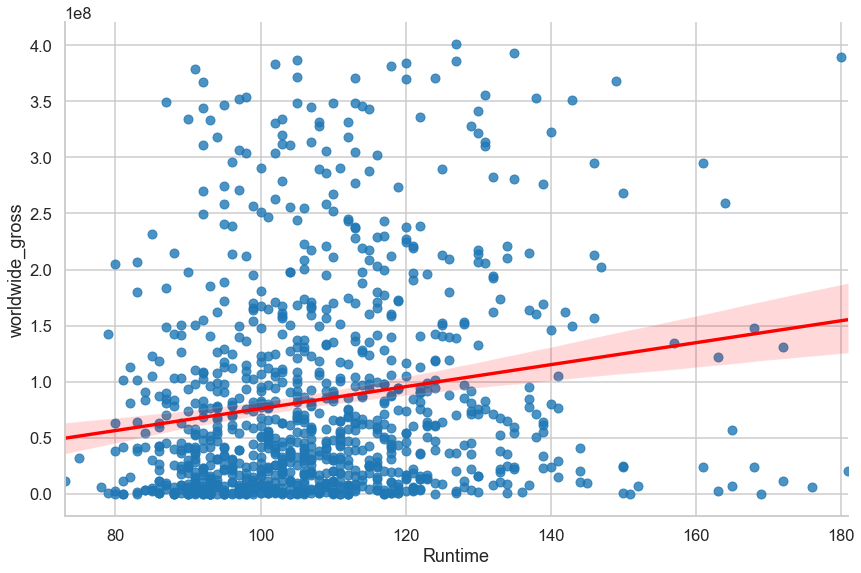

In [137]:
sns.lmplot(x="Runtime", y="worldwide_gross", data=wwgross_im_db, line_kws={'color': 'red'}, height=8, aspect=1.5);

## GENRES AND RATINGS - Old, Unused Effort
________________________
### Preparing Data for Visualization
- Below, we are determining which genres will remain in the data for vizualization purposes

In [ ]:
# reading SQL query for movie reviews into dataframe - run 1
q = """
SELECT
    mb.movie_id
    ,mb.primary_title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
ORDER BY
    mb.runtime_minutes DESC
;"""
df_allrt = pd.read_sql(q, conn)
df_allrt

In [ ]:
# getting population dataset statistics - run 1
df_allrt.describe()

In [ ]:
# getting information about top 12 genres to determine value where necessary to cut off genres below
df_allrt.value_counts('genres').nlargest(12)

In [ ]:
# filtered SQL Query, then read into the specialized visualization dataframe
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Drama'
                        ,'Documentary'
                        ,'Comedy'
                        ,'Comedy,Drama'
                        ,'Horror'
                        ,'Drama,Romance'
                        ,'Comedy,Romance'
                        ,'Comedy,Drama,Romance'
                        ,'Thriller'
                        ,'Horror,Thriller'
                        ,'Drama,Thriller'
                        ,'Action')
ORDER BY
    mb.runtime_minutes DESC
;"""
df_viz1 = pd.read_sql(q, conn)
df_viz1

### In query above, cutting off every genre that has less films than action. 
Need to carefully consider approach to visualization.

### Visualization Checklist
- one graph for single genre films
- one graph for more-than-one-genre films (after exclusion for single entries)
- one graph for more-than-one-genre films AND single genre films

### z-test Checklist 
- test each genre for relevance
    - set up separation of genres from data source, will do once then should be able to copy format for each genre being excluded and tested on
    - population mean and std dev will be mean of overall data found above, sample mean will be that of the genre tested on

In [ ]:
df_viz1.info()

### Visualization for Reviews and Genres

### Visualization Checklist
- one graph for single genre films
- one graph for more-than-one-genre films (after exclusion for single entries)
- one graph for more-than-one-genre films AND single genre films - only one made before team decision to pivot.

### z-test Checklist 
- test each genre for relevance
    - set up separation of genres from data source, will do once then should be able to copy format for each genre being excluded and tested on
    - population mean and std dev will be mean of overall data found above, sample mean will be that of the genre tested on

In [ ]:
df_viz1.info()

### FINDING MEANS OF AVERAGE RATINGS FOR EACH TOP 12 GENRE
Below, I am pulling a query for a subset of the genres and creating a dataframe for each of the genres to pull their df.mean() for z-testing.

In [ ]:
# Drama mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Drama')
ORDER BY
    mb.runtime_minutes DESC
;"""
drama_df = pd.read_sql(q, conn)
drama_rating = drama_df['AverageRating'].mean()
print(drama_rating)

In [ ]:
# Documentary mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Documentary')
ORDER BY
    mb.runtime_minutes DESC
;"""
documentary_df = pd.read_sql(q, conn)
documentary_rating = documentary_df['AverageRating'].mean()
print(documentary_rating)

In [ ]:
# Comedy mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Comedy')
ORDER BY
    mb.runtime_minutes DESC
;"""
comedy_df = pd.read_sql(q, conn)
comedy_rating = comedy_df['AverageRating'].mean()
print(comedy_rating)

In [ ]:
# Comedy,Drama mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Comedy,Drama')
ORDER BY
    mb.runtime_minutes DESC
;"""
comdram_df = pd.read_sql(q, conn)
comdram_rating = comdram_df['AverageRating'].mean()
print(comdram_rating)

In [ ]:
# horror mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Horror')
ORDER BY
    mb.runtime_minutes DESC
;"""
horror_df = pd.read_sql(q, conn)
horror_rating = horror_df['AverageRating'].mean()
print(horror_rating)

In [ ]:
# Drama,Romance Romance mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Drama,Romance')
ORDER BY
    mb.runtime_minutes DESC
;"""
dramrom_df = pd.read_sql(q, conn)
dramrom_rating = dramrom_df['AverageRating'].mean()
print(dramrom_rating)

In [ ]:
# Comedy,Romance mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Comedy,Romance')
ORDER BY
    mb.runtime_minutes DESC
;"""
romcom_df = pd.read_sql(q, conn)
romcom_rating = romcom_df['AverageRating'].mean()
print(romcom_rating)

In [ ]:
# Comedy,Drama,Romance mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Comedy,Drama,Romance')
ORDER BY
    mb.runtime_minutes DESC
;"""
dramromcom_df = pd.read_sql(q, conn)
dramromcom_rating = dramromcom_df['AverageRating'].mean()
print(dramromcom_rating)

In [ ]:
# Thriller mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Thriller')
ORDER BY
    mb.runtime_minutes DESC
;"""
thr_df = pd.read_sql(q, conn)
thr_rating = thr_df['AverageRating'].mean()
print(thr_rating)

In [ ]:
# Horror,Thriller mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Horror,Thriller')
ORDER BY
    mb.runtime_minutes DESC
;"""
horthr_df = pd.read_sql(q, conn)
horthr_rating = horthr_df['AverageRating'].mean()
print(horthr_rating)

In [ ]:
# Drama,Thriller mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Drama,Thriller')
ORDER BY
    mb.runtime_minutes DESC
;"""
dramthr_df = pd.read_sql(q, conn)
dramthr_rating = dramthr_df['AverageRating'].mean()
print(dramthr_rating)

In [ ]:
# Action mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Action')
ORDER BY
    mb.runtime_minutes DESC
;"""
act_df = pd.read_sql(q, conn)
act_rating = act_df['AverageRating'].mean()
print(act_rating)

### Ho:
##### - There is no difference between a respective top 12 genre's ratings and all other genres. 

### Ha:
##### - There is a difference between a respective top 12 genre's ratings and all other genres at the 95% level. 

In [ ]:
# viewing statistics of population
df_allrt.describe()

In [ ]:
df_viz1.value_counts('genres')

In [ ]:
# z-test - Drama run

x_bar = drama_rating
n = 6200
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

In [ ]:
# z-test - Documentary run

x_bar = documentary_rating
n = 3518
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

In [ ]:
# z-test - Comedy run

x_bar = comedy_rating
n = 3131
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

In [ ]:
# z-test - Comdedy,Drama run (Dramedy)

x_bar = comdram_rating
n = 1820
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

In [ ]:
# z-test - Horror run

x_bar = horror_rating
n = 1392
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

In [ ]:
# z-test - Drama,Romance run

x_bar = dramrom_rating
n = 1059
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

In [ ]:
# z-test - Comedy,Romance run (Romantic Comedy)

x_bar = romcom_rating
n = 927
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

In [ ]:
# z-test - Comedy,Drama,Romance run

x_bar = dramromcom_rating
n = 862
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

In [ ]:
# z-test - Thriller run

x_bar = thr_rating
n = 834
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

In [ ]:
# z-test - Horror,Thriller run

x_bar = horthr_rating
n = 749
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

In [ ]:
# z-test - Drama,Thriller run

x_bar = dramthr_rating
n = 678
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

In [ ]:
# z-test - Action run

x_bar = act_rating
n = 433
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

In [ ]:
# REWORK AFTER CLEANING DATA SET OF EXTRA GENRES
# inserting genre values below


# values = [drama_rating,documentary_rating,comedy_rating,comdram_rating,horror_rating,dramrom_rating,romcom_rating,dramromcom_rating,thr_rating,horthr_rating,dramthr_rating,act_rating] 

# means came from below work to do z-tests

# top_12_genres = ['Drama','Documentary','Comedy','Comedy,Drama','Horror','Drama,Romance','Comedy,Romance','Comedy,Drama,Romance','Thriller','Horror,Thriller','Drama,Thriller','Action'] 

# corresponds to genre ratings in values list

# fig, ax = plt.subplots(figsize=(12, 10))

# ax.bar(values, 10, tick_label=top_12_genres)

# ax.set_title("Average Rating by Genre")
# ax.set_ylabel("Average Rating")
# ax.set_xlabel("Genres");

## Frida

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

## Enrique

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

## John

In [ ]:
# Your code here - remember to use markdown cells for comments as well!